<a href="https://colab.research.google.com/github/Anoop-Dey/GitLearningDS/blob/master/EDA_and_ML_project_on_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS WITH PYTHON ON CARS

![alt text](https://i.ytimg.com/vi/iEZtaNyg3qc/maxresdefault.jpg)

## Introduction

***What is Exploratory Data Analysis and why we require it ?***

    Tukey defined data analysis in 1961 as: "Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.
    
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

***So what data are we exploring today ?***

   The data-set can be downloaded from this source [data.csv](https://www.kaggle.com/CooperUnion/cardataset). To give a brief information about the data set this data contains around 12, 000 rows and 16 columns which contains features of the car such as Price(MSRP), Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this notebook, we will explore the data and make it ready for modeling.

## 1. Import the dataset and the necessary libraries, check datatype, statistical summary, shape, null values etc.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set() #setting the default seaborn style for our plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files

#Upload the downloaded file from your local machine here in this line of code

upload = files.upload()


Saving data.csv to data.csv


# 1.1 - Load a dataset and extract basic information 

In [ ]:
import io
df = pd.read_csv(io.BytesIO(upload['data.csv']))

In [ ]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
print("\nNumber of rows are:", df.shape[0], "\nNo of columns are:", df.shape[1])


Number of rows are: 11914 
No of columns are: 16


### 1.2 - Checking the basic summary stats and the types of data

Here we check for the datatypes of all columns because sometimes for example the MSRP or the price of the car would be stored as a string, so if it happens then, we have to convert that string to the integer data then only we can represent the data via graphs. Here, in this case, the data is already in integer format so there is nothing to worry.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
print("\nBasic Stats about the dataset:\n\n")
df.describe().T


Basic Stats about the dataset:




,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [ ]:
print("\n\nUnique data points in each columns are: ")
for column in df:
    print(column + ' -> ' +str(df[column].nunique()))



Unique data points in each columns are: 
Make -> 48
Model -> 915
Year -> 28
Engine Fuel Type -> 10
Engine HP -> 356
Engine Cylinders -> 9
Transmission Type -> 5
Driven_Wheels -> 4
Number of Doors -> 3
Market Category -> 71
Vehicle Size -> 3
Vehicle Style -> 16
highway MPG -> 59
city mpg -> 69
Popularity -> 48
MSRP -> 6049


## 2. Are there any columns in the dataset which you think are of less relevance. If so, give your reasoning and drop them

This step is mandatory in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the column such as Market Category having too many null values doesn't make any sense to me so I just dropped for this instance.

In [ ]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [ ]:
df.drop(columns="Market Category", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

## 3. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just changed their column names for simplicity. This is a good approach in practice, it improves the readability of the data set.

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


## 4. Plotting graphs of various columns to check for outliers and remove those data points from the dataset.


   An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence in practice it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower(HP) and Popularity. Herein all the plots, you can find some points are outside the box they are none other than outliers. To know more about handling outliers, here is a resource [pluralsight](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers).

### 4.1 - Checking for Outliers

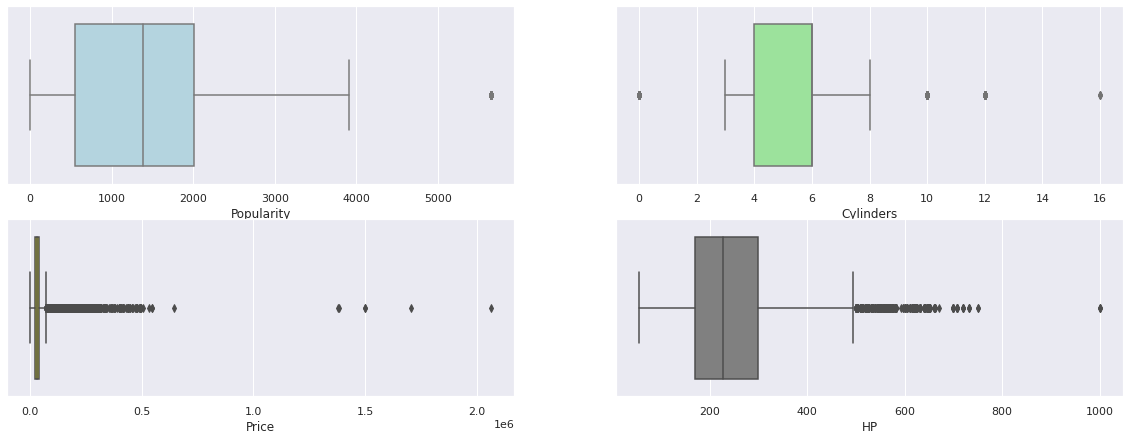

In [ ]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(4,2,1)
sns.boxplot(x= df.Popularity, color='lightblue')

plt.subplot(4,2,2)
sns.boxplot(x= df.Cylinders, color='lightgreen')

plt.subplot(4,2,3)
sns.boxplot(x= df.Price, color='Yellow')

plt.subplot(4,2,4)
sns.boxplot(x= df.HP, color='grey')

plt.show()

### 4.2 - Removing Outliers by interquartile range method 

In [ ]:
quarter1 = df.quantile(0.25)
quarter3 = df.quantile(0.75)
interquartile_range = quarter3 - quarter1
print(interquartile_range)

Year                   9.00
HP                   130.00
Cylinders              2.00
Number of Doors        2.00
MPG-H                  8.00
MPG-C                  6.00
Popularity          1460.00
Price              21231.25
dtype: float64


In [ ]:
df[~((df < (quarter1 - 1.5 * interquartile_range))|(df > (quarter3 + 1.5 * interquartile_range))).any(axis=1)].shape

(9084, 15)

## 5. Check for any duplicates in the data, check for null values and missing data and remove them or manipulating/imputing the missing values


### 5.1 - Checking for any duplicates in the data, check for null values

   This is often a handy technique to do so because there is a huge data set as in this case containing more than 11,000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate values from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 11,194 data which is means that I had 720 rows of duplicate data.

In [ ]:
df['Engine Fuel Type'].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [ ]:
df['HP'].value_counts().head(12)

200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
185.0    241
150.0    232
138.0    199
300.0    192
220.0    171
355.0    158
155.0    156
Name: HP, dtype: int64

In [ ]:
df['Vehicle Size'].value_counts()

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle Size, dtype: int64

In [ ]:
df['Cylinders'].value_counts()

4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Cylinders, dtype: int64

In [ ]:
df['Drive Mode'].value_counts()

front wheel drive    4787
rear wheel drive     3371
all wheel drive      2353
four wheel drive     1403
Name: Drive Mode, dtype: int64

In [ ]:
df['Number of Doors'].value_counts()

4.0    8353
2.0    3160
3.0     395
Name: Number of Doors, dtype: int64

In [ ]:
print("number of duplicate rows: ", df[df.duplicated()].shape[0])

number of duplicate rows:  720


In [ ]:
print(df.duplicated().sum(), "\n\n")
df=df.drop_duplicates()
df.info()

720 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11194 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11194 non-null  object 
 1   Model             11194 non-null  object 
 2   Year              11194 non-null  int64  
 3   Engine Fuel Type  11191 non-null  object 
 4   HP                11125 non-null  float64
 5   Cylinders         11164 non-null  float64
 6   Transmission      11194 non-null  object 
 7   Drive Mode        11194 non-null  object 
 8   Number of Doors   11188 non-null  float64
 9   Vehicle Size      11194 non-null  object 
 10  Vehicle Style     11194 non-null  object 
 11  MPG-H             11194 non-null  int64  
 12  MPG-C             11194 non-null  int64  
 13  Popularity        11194 non-null  int64  
 14  Price             11194 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

### 5.2 - Manipulating or Imputing the missing values and Deleting the remaining junk in the Dataset

   Imputation preserves all cases by replacing missing data with an estimated value based on available information. The estimated value can be mean, median, mode, ffill, bfill methods or even using strategies like Most Frequent etc. For more information, about the Imputational methods on missing data you can have a look at this article at [towards data science](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779)

In [ ]:
df['HP'].fillna(method='bfill', inplace=True)

In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                   0
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [ ]:
df['Engine Fuel Type'].replace(np.nan, value='mode', inplace=True)

In [ ]:
df['Cylinders'].value_counts()

4.0     4361
6.0     4288
8.0     1964
12.0     228
5.0      169
10.0      65
0.0       56
3.0       30
16.0       3
Name: Cylinders, dtype: int64

In [ ]:
df['Cylinders'].replace(0.0, 4.0, inplace=True)

In [ ]:
df.dropna(inplace=True) #Deleting remaining unwanted rows

In [ ]:
df['Cylinders'].value_counts()

4.0     4412
6.0     4288
8.0     1964
12.0     227
5.0      169
10.0      65
3.0       30
16.0       3
Name: Cylinders, dtype: int64

In [ ]:
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11158 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11158 non-null  object 
 1   Model             11158 non-null  object 
 2   Year              11158 non-null  int64  
 3   Engine Fuel Type  11158 non-null  object 
 4   HP                11158 non-null  float64
 5   Cylinders         11158 non-null  float64
 6   Transmission      11158 non-null  object 
 7   Drive Mode        11158 non-null  object 
 8   Number of Doors   11158 non-null  float64
 9   Vehicle Size      11158 non-null  object 
 10  Vehicle Style     11158 non-null  object 
 11  MPG-H             11158 non-null  int64  
 12  MPG-C             11158 non-null  int64  
 13  Popularity        11158 non-null  int64  
 14  Price             11158 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [ ]:
df['Transmission'].value_counts()

AUTOMATIC           7921
MANUAL              2620
AUTOMATED_MANUAL     552
DIRECT_DRIVE          53
UNKNOWN               12
Name: Transmission, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

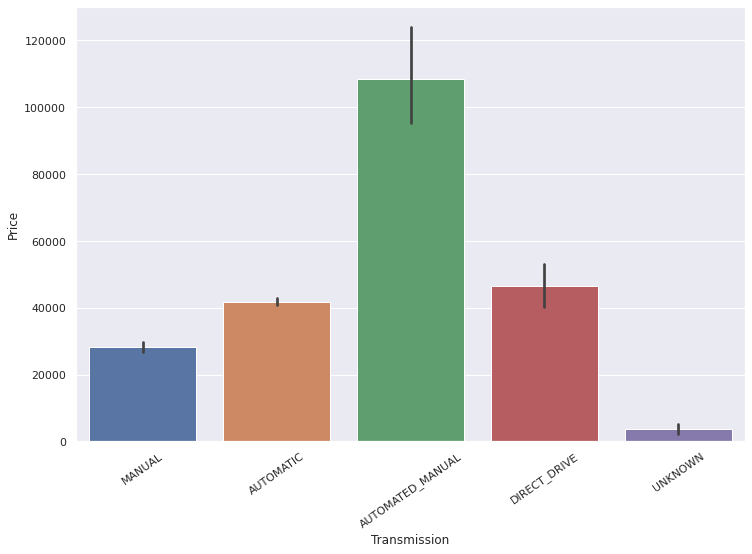

In [ ]:
plt.figure(figsize= (12,8))
sns.barplot(x=df['Transmission'], y=df['Price'])
plt.xticks(rotation=35)

In [ ]:
df['Transmission'].replace('UNKNOWN', method='ffill', inplace=True)
df['Transmission'].value_counts()

AUTOMATIC           7926
MANUAL              2627
AUTOMATED_MANUAL     552
DIRECT_DRIVE          53
Name: Transmission, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

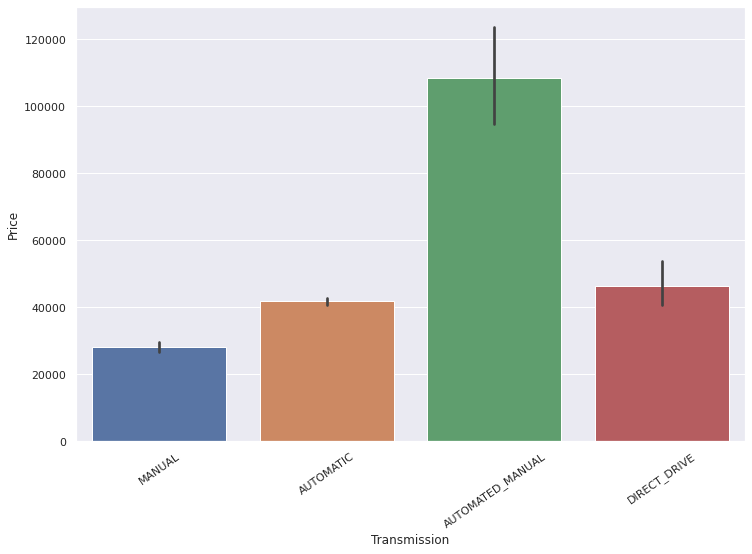

In [ ]:
plt.figure(figsize= (12,8))
sns.barplot(x=df['Transmission'], y=df['Price'])
plt.xticks(rotation=35)

## 6.  What car brands are the most represented in the dataset and find the average price among the top car brands.


In [ ]:
df['Make'].value_counts().head(10)

Chevrolet     1081
Ford           824
Toyota         715
Volkswagen     564
Nissan         551
Dodge          528
GMC            482
Honda          433
Cadillac       396
Mazda          392
Name: Make, dtype: int64

### 6.1 - List of top 10 car brands which are the most represented in the dataset

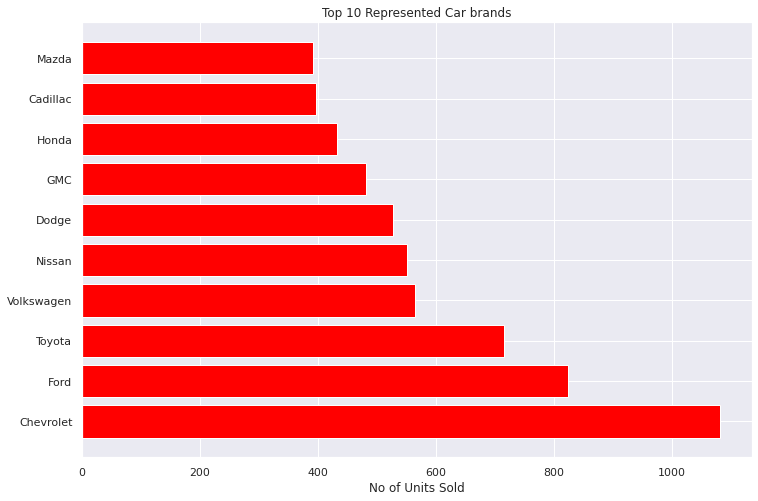

In [ ]:
counts = df['Make'].value_counts() #Sorted by Descending Order

# Top 10 represented brands
top10 = counts.index[:10]

# plotting the graph
plt.figure(figsize=(12,8))
plt.barh(top10, color='Red', width=counts[:10])
plt.title('Top 10 Represented Car brands')
plt.xlabel('No of Units Sold')
plt.show()

In [ ]:
avg_prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
                                       (df['Make'] == 'Volkswagen')|
                                       (df['Make'] == 'Ford')|
                                       (df['Make'] == 'Dodge')|
                                       (df['Make'] == 'Toyota')|
                                       (df['Make'] == 'Cadillac')|
                                       (df['Make'] == 'Nissan')|
                                       (df['Make'] == 'GMC')|
                                       (df['Make'] == 'Honda')|
                                       (df['Make'] == 'Mazda')].groupby('Make').mean()
print("The average prices of top 10 car brands are:\n\n", avg_prices) # finding average prices of top 10 car brands

The average prices of top 10 car brands are:

                    Price
Make                    
Cadillac    56368.265152
Chevrolet   29056.802035
Dodge       24900.335227
Ford        28508.111650
GMC         32444.085062
Honda       26655.147806
Mazda       20106.556122
Nissan      28921.152450
Toyota      28806.667133
Volkswagen  28947.368794


### 6.2 - Finding the average prices of top 10 car brands

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

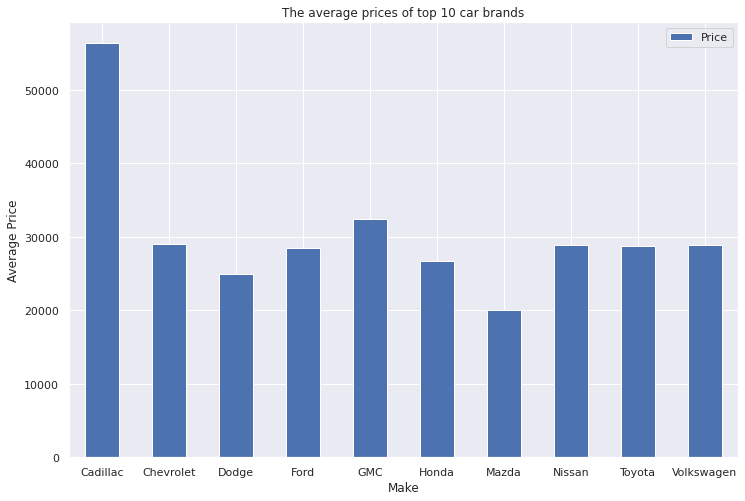

In [ ]:
#plotting the average prices of top 10 brands

avg_prices.plot(title='The average prices of top 10 car brands', kind='bar', figsize=(12, 8))
plt.ylabel('Average Price') 
plt.xticks(rotation=0)

## 7. Plot the correlation matrix

### There is High correlation between
    
   - Cylinders & HP
   - Highway mpg & City mpg
   - HP & Price
   - Price & Cylinders
   
   The more the cylinders are, the more powerful the car is, along with the price tag and also if any car has High Miles per Gallon in Highway Roads(MPG-H), there is high chances that the car also has High Miles per Gallon in City Roads(MPG-C)

### There is High anticorrelation between
   
   - Cylinders & highway mpg
   - Cylinders & city mpg
    
   HP and Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption and higher Horsepower.

In [ ]:
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.334465,-0.027805,0.246357,0.249308,0.193176,0.085875,0.209405
HP,0.334465,1.000000,0.790139,-0.129948,-0.393773,-0.398681,0.038185,0.657086
Cylinders,-0.027805,0.790139,1.000000,-0.148289,-0.542469,-0.497557,0.041782,0.553021
Number of Doors,0.246357,-0.129948,-0.148289,1.000000,0.114042,0.121901,-0.056958,-0.145125
MPG-H,0.249308,-0.393773,-0.542469,0.114042,1.000000,0.875075,-0.014550,-0.176908
MPG-C,0.193176,-0.398681,-0.497557,0.121901,0.875075,1.000000,0.004320,-0.176681
Popularity,0.085875,0.038185,0.041782,-0.056958,-0.014550,0.004320,1.000000,-0.049062
Price,0.209405,0.657086,0.553021,-0.145125,-0.176908,-0.176681,-0.049062,1.000000


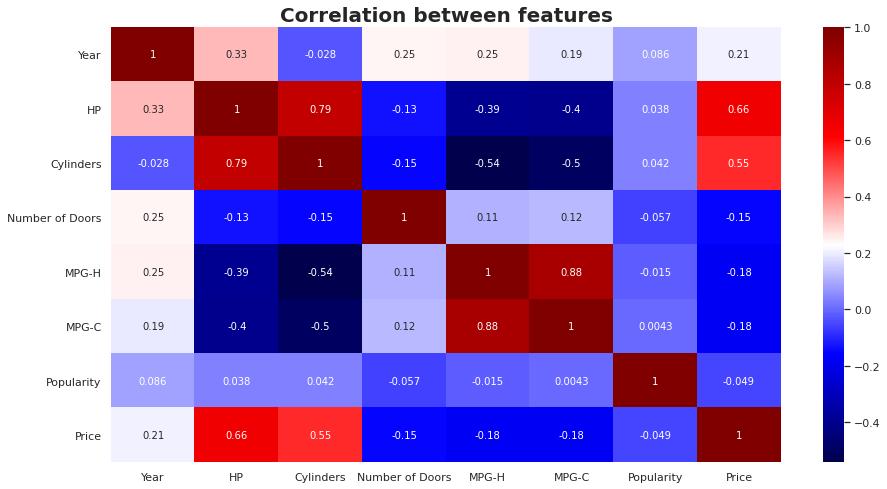

In [ ]:
car=df.corr()
fig, ax=plt.subplots(figsize=(15,8))
sns.heatmap(car, cmap='seismic',annot=True)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=20)
plt.show()

## 8. Performing Exploratory Data Analysis

Text(0.5, 0, 'No of Vehicles sold')

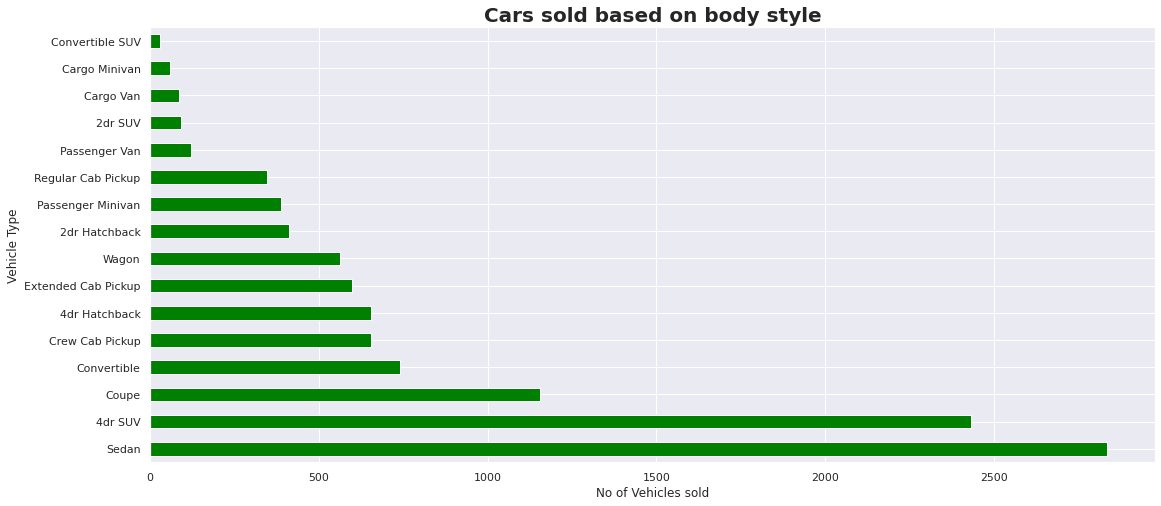

In [ ]:
vstyle=df['Vehicle Style'].value_counts()
vstyle.plot(kind='barh', figsize=(18,8), color='green')
plt.title('Cars sold based on body style', weight='bold', fontsize=20)
plt.ylabel('Vehicle Type')
plt.xlabel('No of Vehicles sold')

# Number of Vehicles sold in 'sedan' vehicle style is most 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

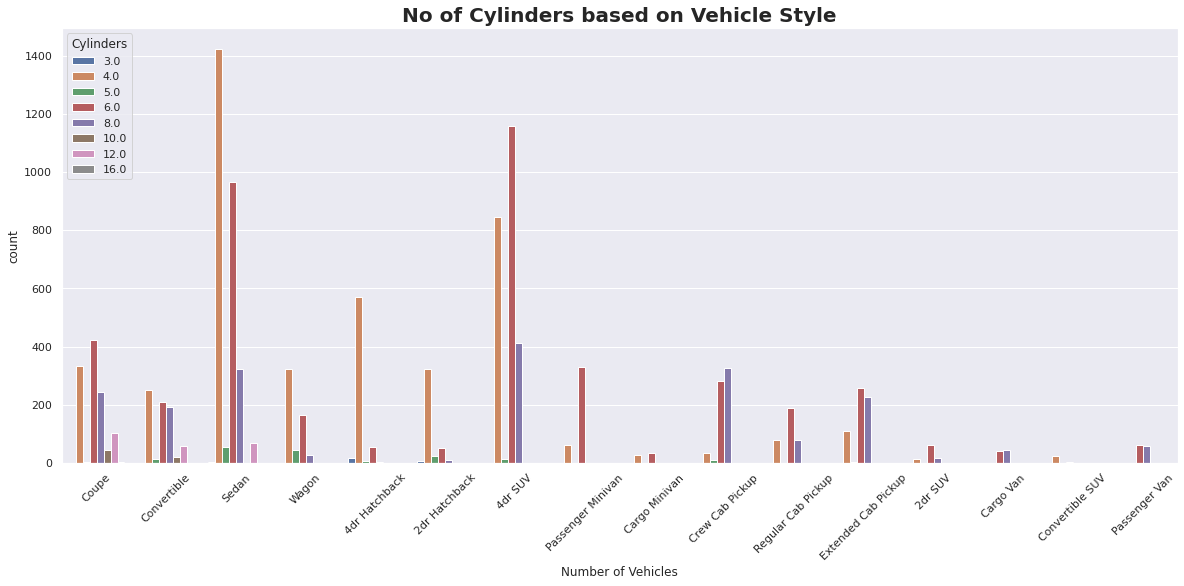

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot(x="Vehicle Style", hue="Cylinders", data=df, ax=ax)
plt.xlabel('Number of Vehicles')
plt.title('No of Cylinders based on Vehicle Style', weight='bold', fontsize=20)
plt.xticks(rotation=45)

# In almost all styles of Vehicles there are 6 Cylinders and 4 Cylinders

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

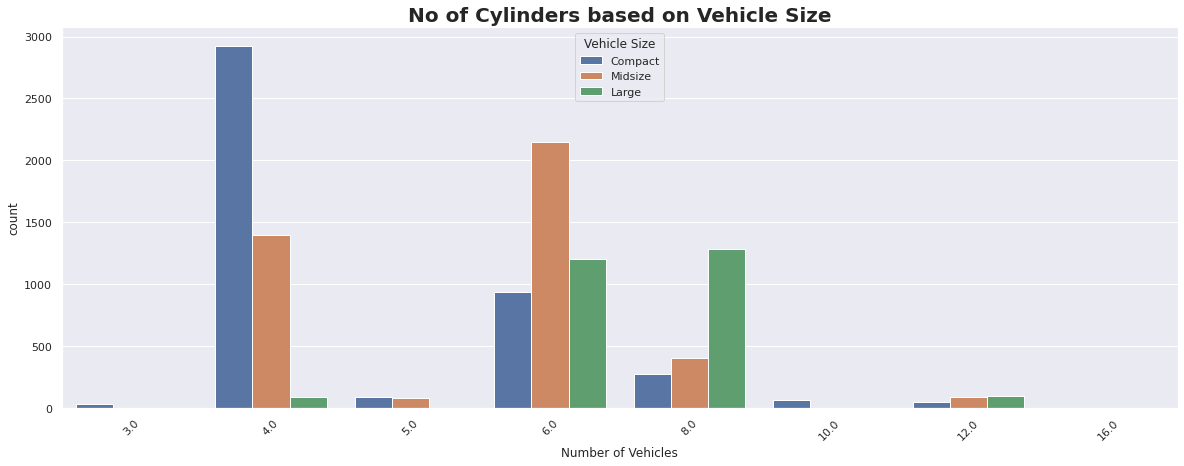

In [ ]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.countplot(x="Cylinders", hue="Vehicle Size", data=df, ax=ax)
plt.xlabel('Number of Vehicles')
plt.title('No of Cylinders based on Vehicle Size', weight='bold', fontsize=20)
plt.xticks(rotation=45)

# In almost all styles of Vehicles there are 6 Cylinders 

Text(0.5, 1.0, 'Number of Vehicle owners using Vehicle Size for Vehicle Style')

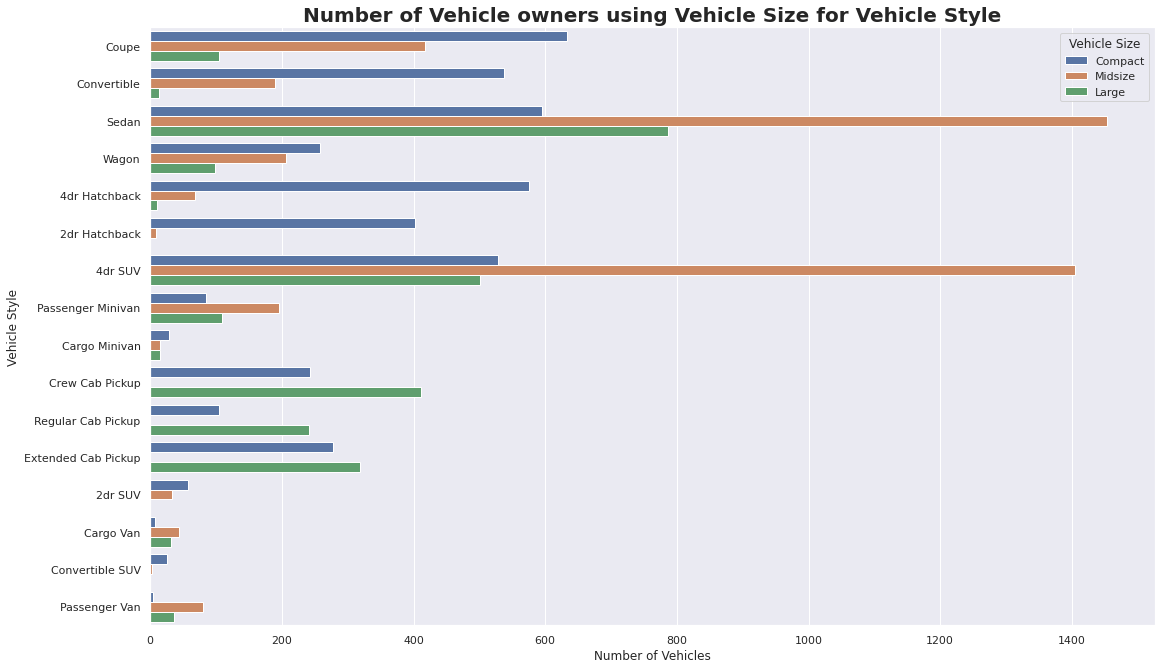

In [ ]:
fig, ax = plt.subplots(figsize=(18, 11))
sns.countplot(y="Vehicle Style", hue="Vehicle Size", data=df, ax=ax)
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicle owners using Vehicle Size for Vehicle Style', weight='bold', fontsize=20)

# For Certain Vehicle Size, there is huge demand of a particular vehicle style

Text(0.5, 1.0, 'Number of Vehicle owners using Drive Modes to decide Vehicle Size')

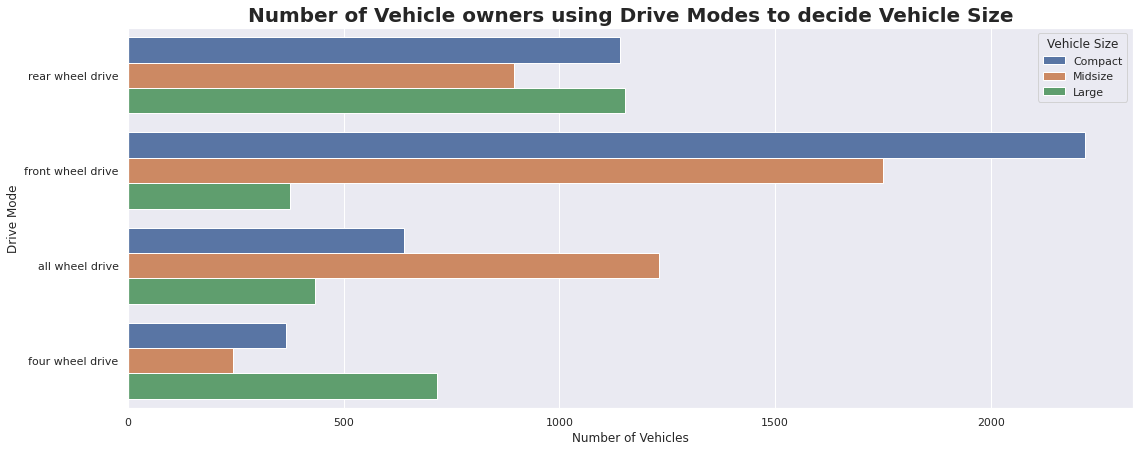

In [ ]:
fig, ax = plt.subplots(figsize=(18, 7))
sns.countplot(y="Drive Mode", hue="Vehicle Size", data=df, ax=ax)
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicle owners using Drive Modes to decide Vehicle Size', weight='bold', fontsize=20)

#For Front Wheel Drive, Most Vehicle Owners are preferring compact size vehicle

Text(0.5, 1.0, 'Number of Vehicle owners using transmission modes for deciding Vehicle Style')

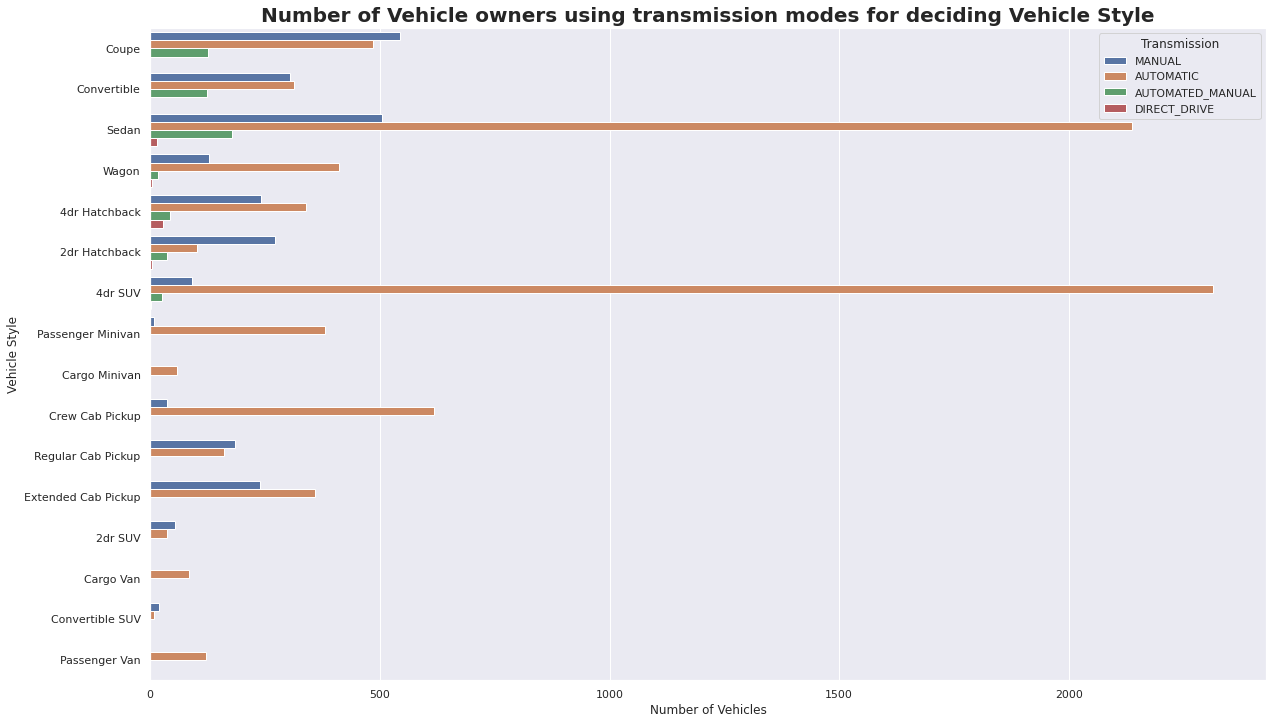

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.countplot(y="Vehicle Style", hue="Transmission", data=df, ax=ax)
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicle owners using transmission modes for deciding Vehicle Style', weight='bold', fontsize=20)

# For Certain Vehicle Styles, There is huge demand for Automatic Transmission mode

Text(0.5, 1.0, 'Number of Vehicle owners using transmission modes to have balance with Vehicle Size')

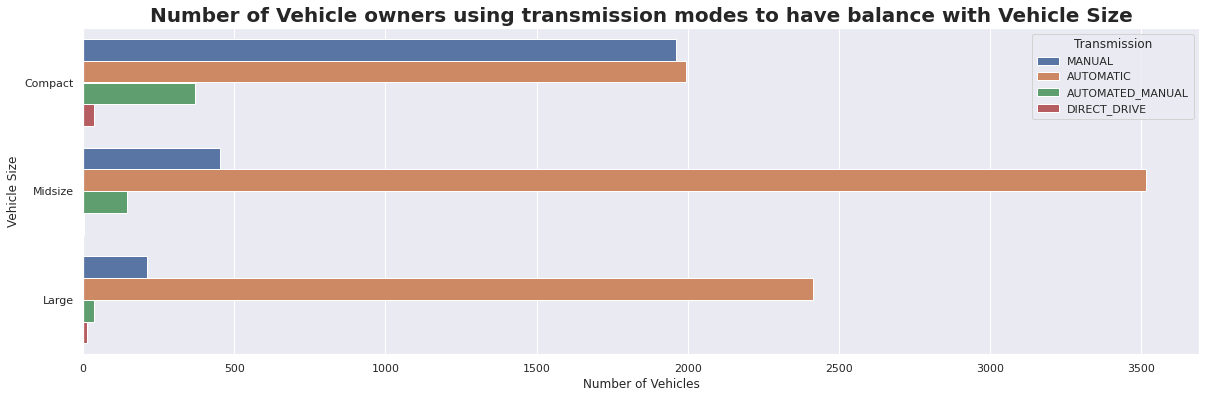

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.countplot(y="Vehicle Size", hue="Transmission", data=df, ax=ax)
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicle owners using transmission modes to have balance with Vehicle Size', weight='bold', fontsize=20)

# Most of the Midsize Vehicles have Automatic Transmission

Text(0.5, 1.0, 'Number of Vehicles owners using Drive Modes as a factor for Vehicle Styles')

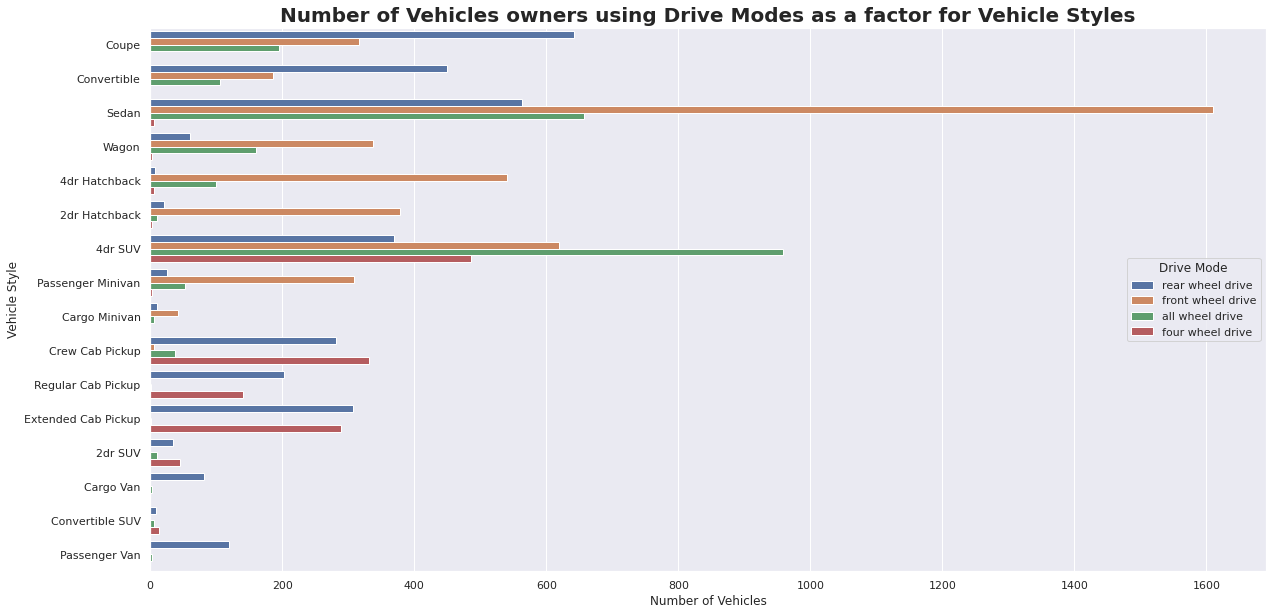

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="Vehicle Style", hue="Drive Mode", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicles owners using Drive Modes as a factor for Vehicle Styles', weight='bold', fontsize=20)

#Certain Vehicle Styles Fulfilling buyers mind for the preference of Drive Mode 

Text(0.5, 1.0, 'Number of Vehicle owners using Drive Modes for Transmission modes')

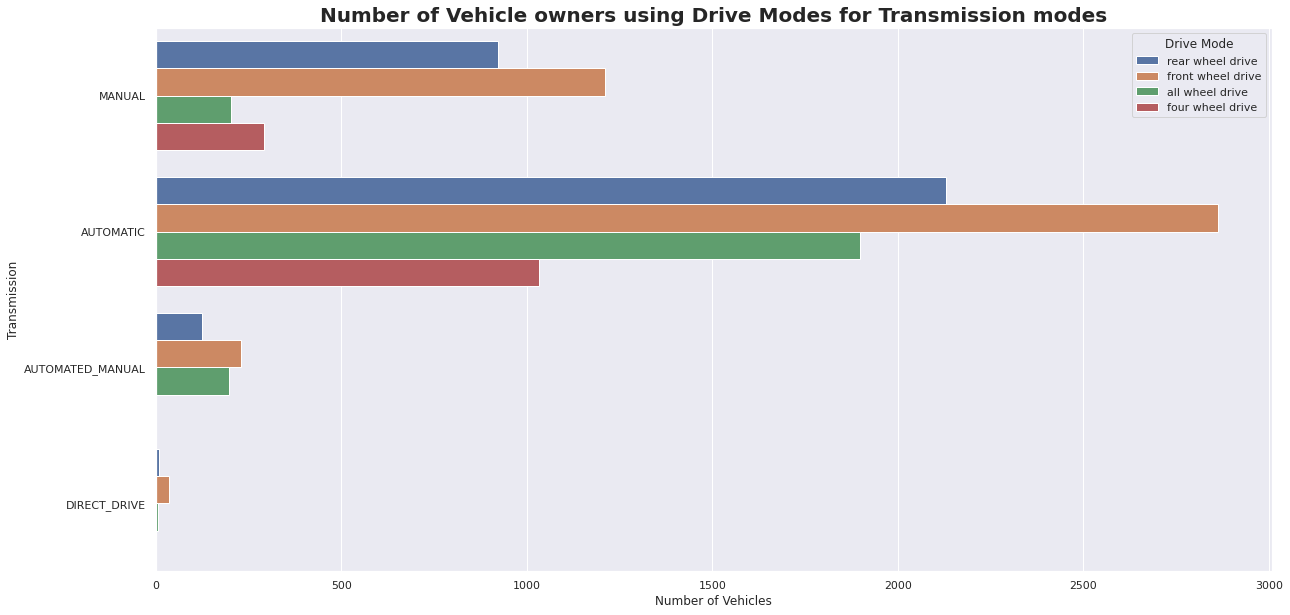

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="Transmission", hue="Drive Mode", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicle owners using Drive Modes for Transmission modes', weight='bold', fontsize=20)

#For the Comfort of Driving Vehicles, for Front Wheel Drive is most preferred one in all transmission modes
#Also Automatic Transmission satisfies all type of drive modes

Text(0.5, 1.0, 'No of Vehicles using Transmission Modes based on Number of Cylinders')

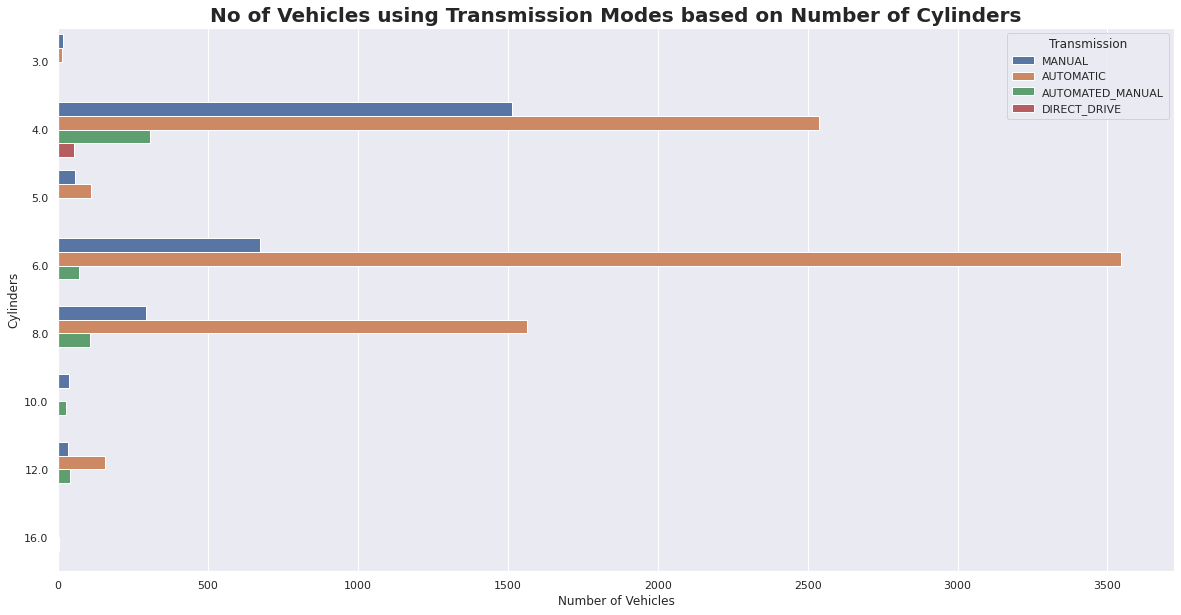

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="Cylinders", hue="Transmission", data=df)
plt.xlabel('Number of Vehicles')
plt.title('No of Vehicles using Transmission Modes based on Number of Cylinders', weight='bold', fontsize=20)

#For Certain Type of Transmission Mode, you can see huge demand of Cylinders to be fitted in vehicle

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text major ticklabel objects>)

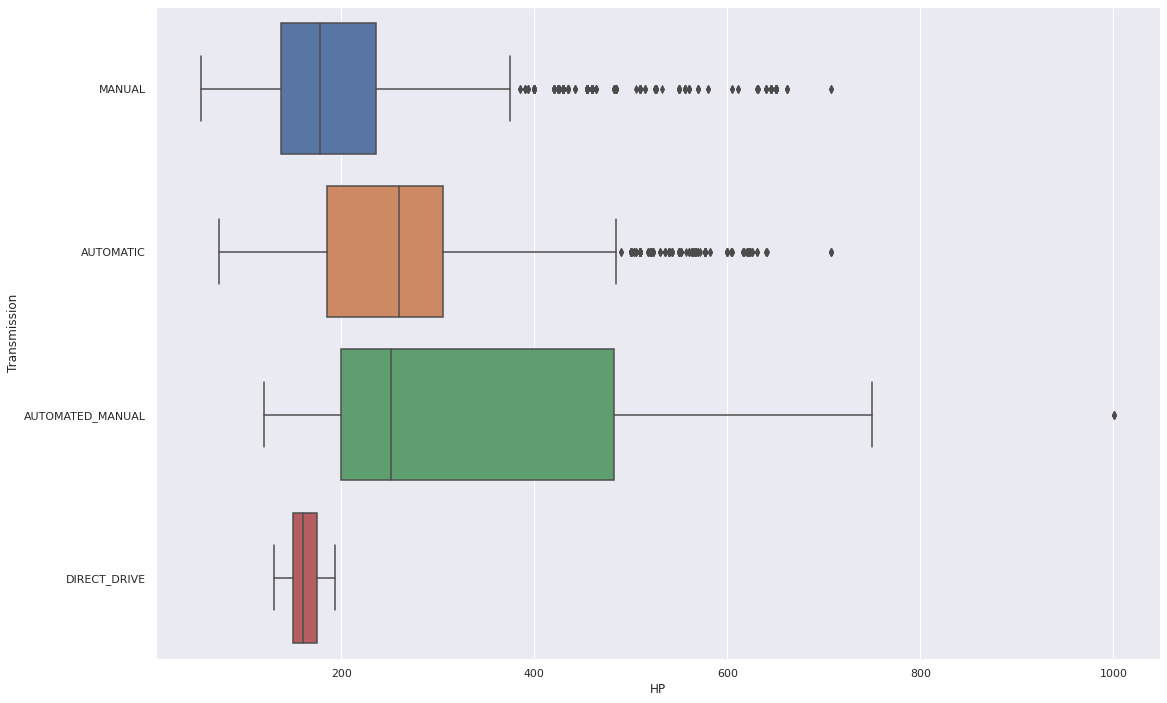

In [ ]:
#Finding insights between Transmission and Horsepower 
#as you can see Direct Drive type of Transmission has least range of Horsepower(HP) 
#which means it has least range of Vehicles at that Transmission Mode

fig, ax = plt.subplots(figsize=(18, 12))
sns.boxplot(y="Transmission", x="HP", data=df)
plt.xticks(rotation =0)

Text(0, 0.5, 'Horsepower of Vehicle')

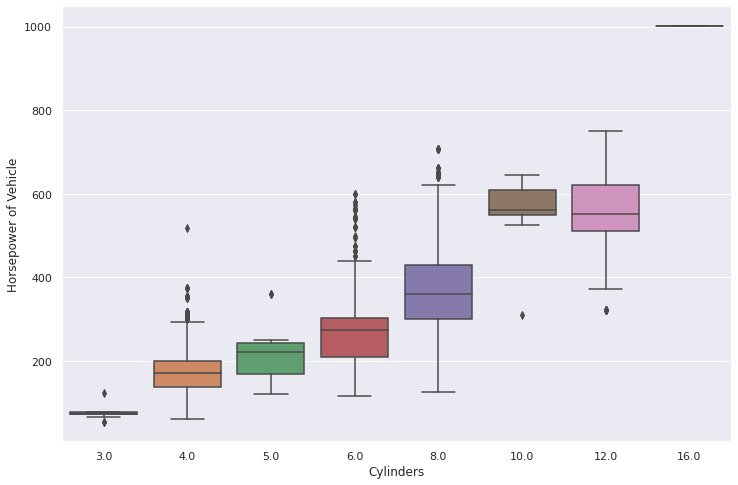

In [ ]:
#As you can see the powerful the car is, the more number of Cylinders the car will have

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(y="HP", x="Cylinders", data=df)
plt.xlabel('Cylinders')
plt.ylabel('Horsepower of Vehicle')

Text(0.5, 1.0, 'Year vs Price')

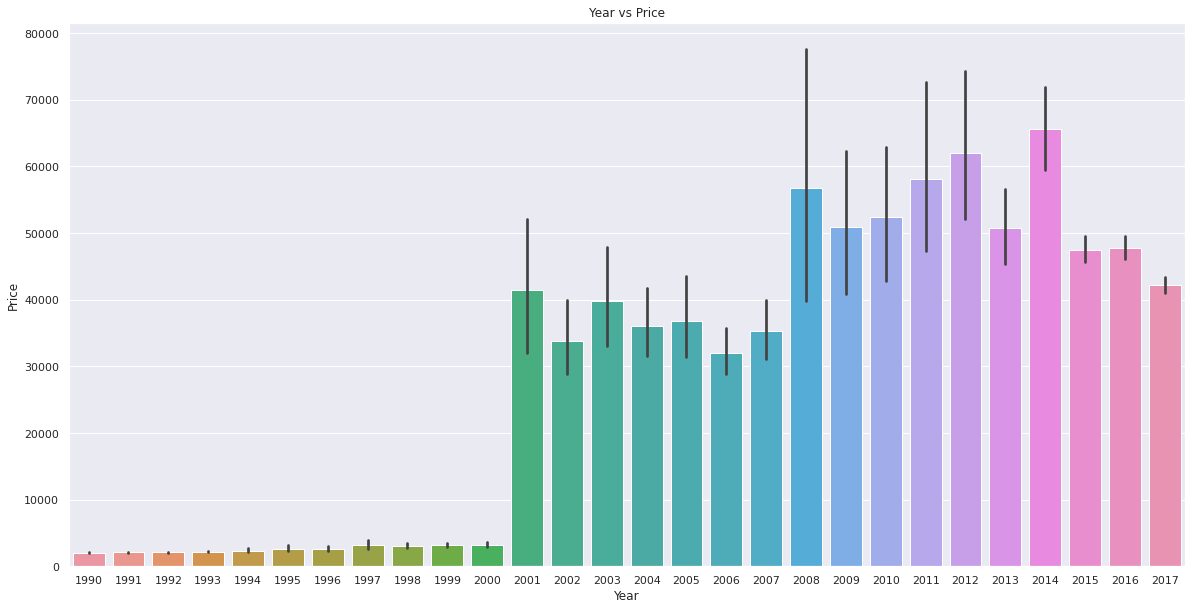

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Year'], y=df['Price'])
plt.title('Year vs Price')

#As the demand for Vehicle is increased due to introduction of new features, the price of Vehicles has also increased

In [ ]:
df['price_range']=pd.cut(df['Price'], [0, 20000, 40000, 60000, 80000, 100000, 200000, 1000000], 
labels=['<20k', '20-39k', '40-59k', '60-79k', '80-99k', '100-199k', '>200k'], include_lowest=True)
df['price_range']=df['price_range'].astype(object)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

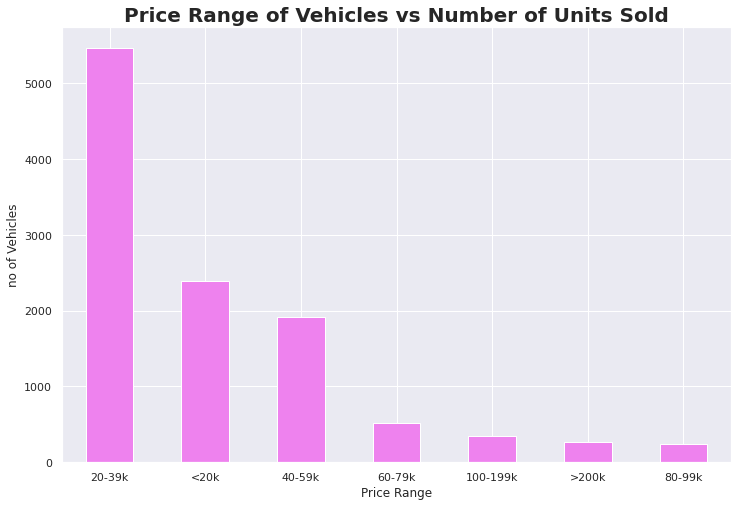

In [ ]:
(df['price_range'].value_counts()).plot.bar(figsize=(12, 8), color='violet')
plt.title('Price Range of Vehicles vs Number of Units Sold', weight='bold', fontsize=20)
plt.ylabel('no of Vehicles')
plt.xlabel('Price Range')
plt.xticks(rotation=0)

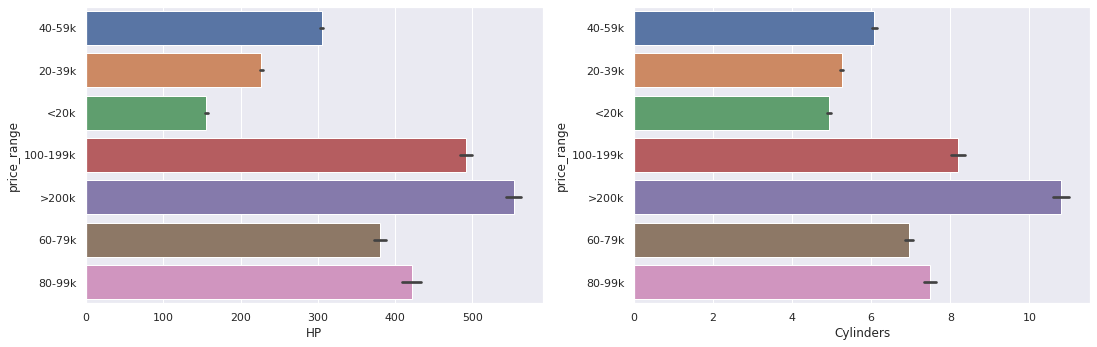

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
sns.barplot(df['HP'], df['price_range'])
plt.subplot(2, 2, 2)
sns.barplot(df['Cylinders'], df['price_range'])

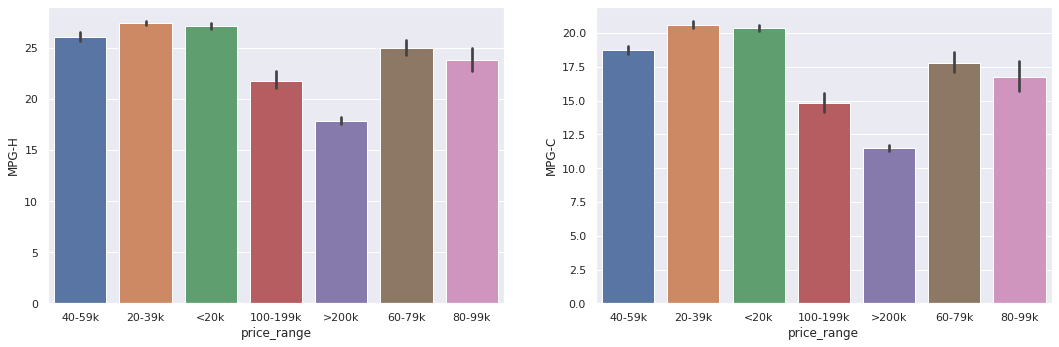

In [ ]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
sns.barplot(df['price_range'], df['MPG-H'])
plt.subplot(2, 2, 2)
sns.barplot(df['price_range'], df['MPG-C'])

# As the Vehicle having low mileage for City and Highway Roads, the price of the vehicle is high

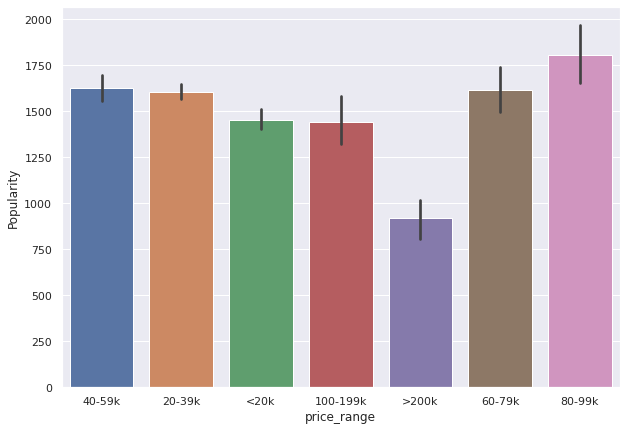

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(df['price_range'], df['Popularity'])

# As Popularity index is low, the Price of the Vehicle is High

Text(0.5, 1.0, 'Usage of Transmission Modes at different price ranges')

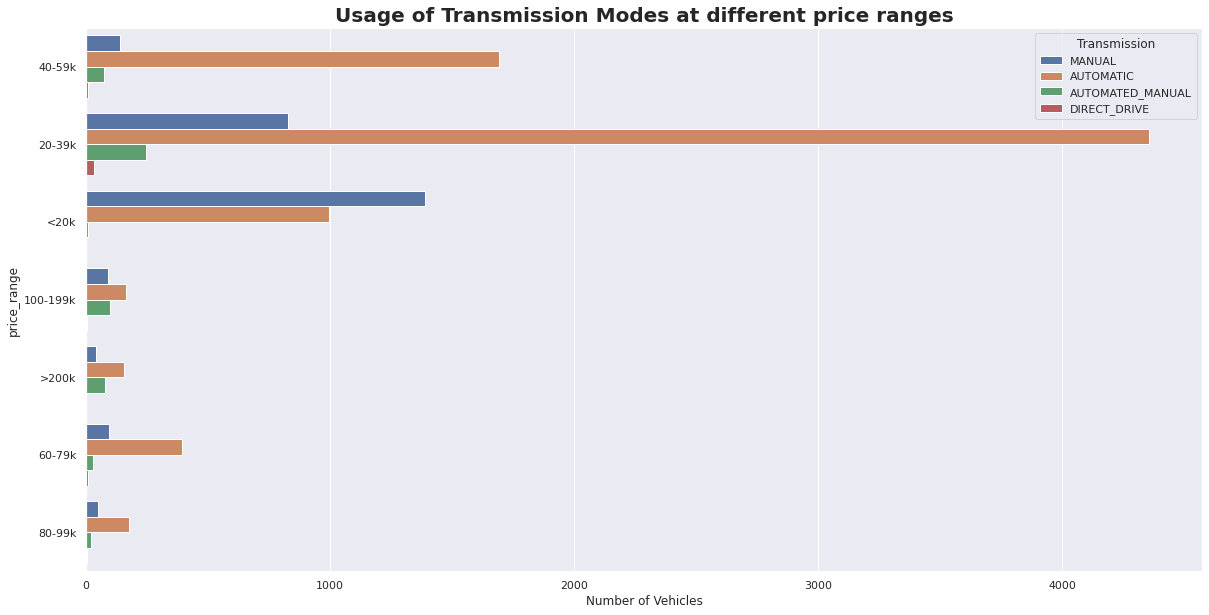

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="price_range", hue="Transmission", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Usage of Transmission Modes at different price ranges', weight='bold', fontsize=20)

Text(0.5, 1.0, 'Preference of Drive Modes at different price ranges')

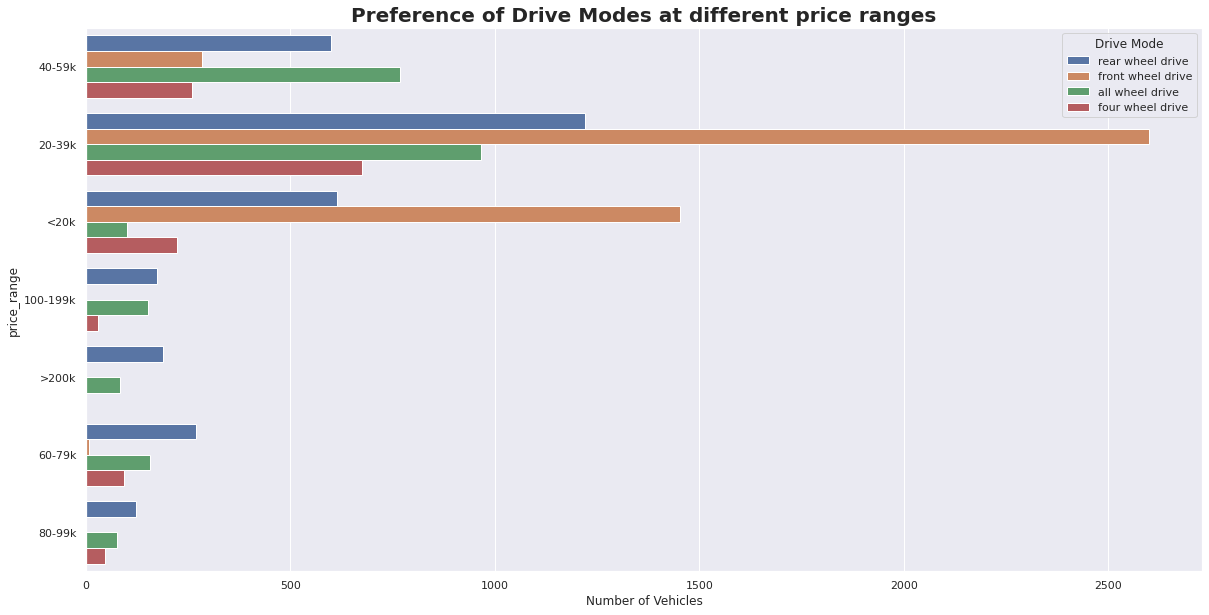

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="price_range", hue="Drive Mode", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Preference of Drive Modes at different price ranges', weight='bold', fontsize=20)

Text(0.5, 1.0, 'Number of Doors at different price ranges')

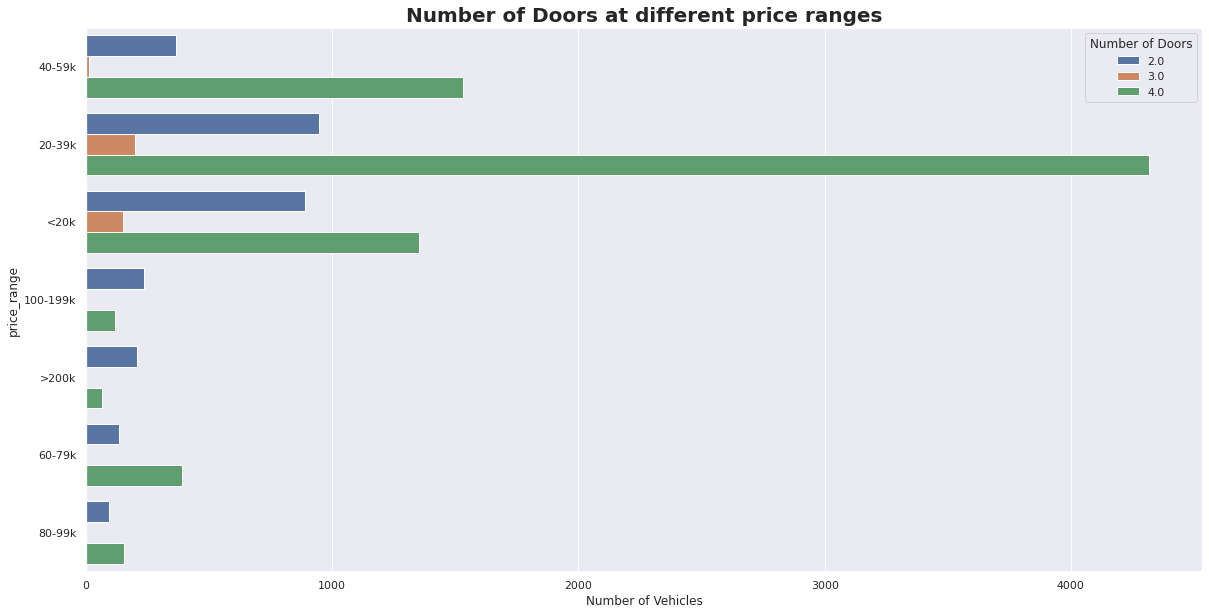

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="price_range", hue="Number of Doors", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Number of Doors at different price ranges', weight='bold', fontsize=20)

Text(0.5, 1.0, 'Preference of Vehicle Sizes at different price ranges')

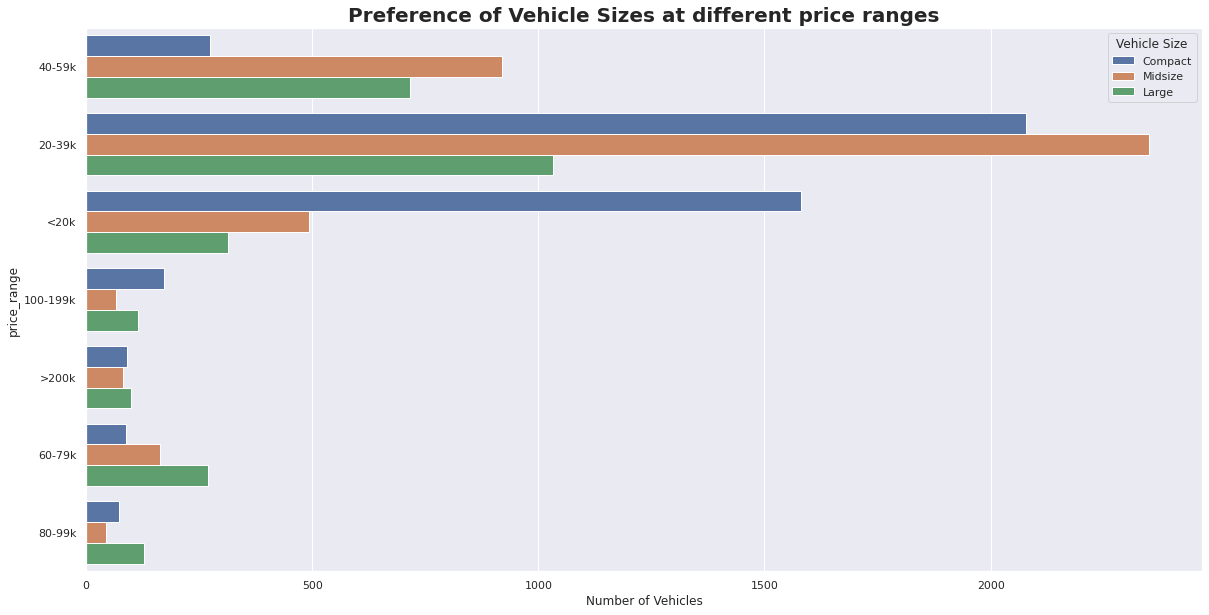

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y="price_range", hue="Vehicle Size", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Preference of Vehicle Sizes at different price ranges', weight='bold', fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

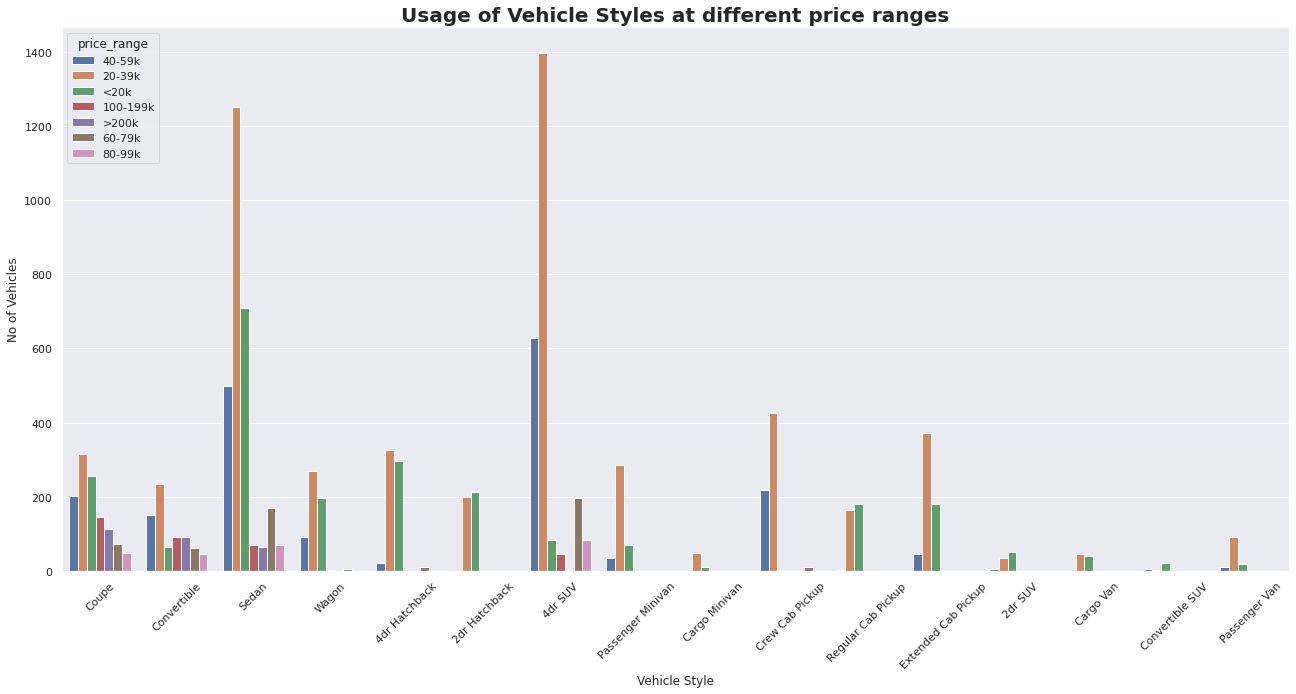

In [ ]:
fig, ax = plt.subplots(figsize=(22, 10))
sns.countplot(x="Vehicle Style", hue="price_range", data=df)
plt.xlabel('Vehicle Style')
plt.ylabel('No of Vehicles')
plt.title('Usage of Vehicle Styles at different price ranges', weight='bold', fontsize=20)
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Number of Cylinder usage at different price ranges')

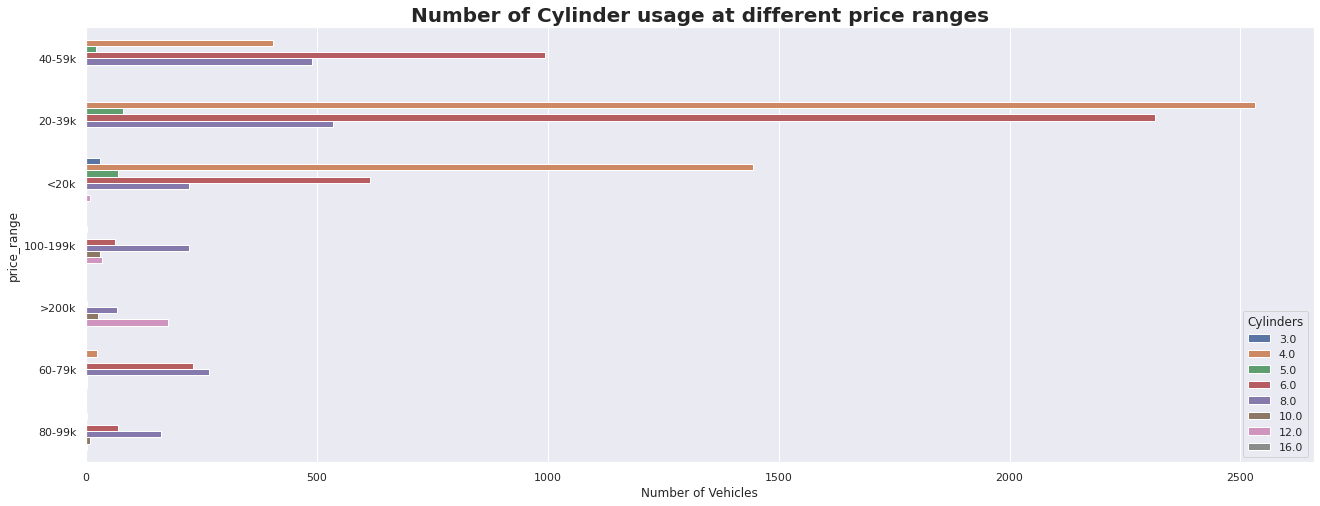

In [ ]:
fig, ax = plt.subplots(figsize=(22, 8))
sns.countplot(y="price_range", hue="Cylinders", data=df)
plt.xlabel('Number of Vehicles')
plt.title('Number of Cylinder usage at different price ranges', weight='bold', fontsize=20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11158 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11158 non-null  object 
 1   Model             11158 non-null  object 
 2   Year              11158 non-null  int64  
 3   Engine Fuel Type  11158 non-null  object 
 4   HP                11158 non-null  float64
 5   Cylinders         11158 non-null  float64
 6   Transmission      11158 non-null  object 
 7   Drive Mode        11158 non-null  object 
 8   Number of Doors   11158 non-null  float64
 9   Vehicle Size      11158 non-null  object 
 10  Vehicle Style     11158 non-null  object 
 11  MPG-H             11158 non-null  int64  
 12  MPG-C             11158 non-null  int64  
 13  Popularity        11158 non-null  int64  
 14  Price             11158 non-null  int64  
 15  price_range       11152 non-null  object 
dtypes: float64(3), int64(5), object(8)
memor

In [ ]:
df.drop(columns="price_range", inplace=True)

## 9. Split the dataset into 80 and 20 ratio and build a machine learning model with Price as the target variable

In [ ]:
#Encoding the Columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df.columns:
  if df[column_name].dtype == object or float:
    df[column_name] = le.fit_transform(df[column_name])
  else:
    pass

In [ ]:
X = df.loc[:, df.columns != 'Price']          # Independent Variables
y = df.Price                          # Target Variable or Dependent Variable

In [ ]:
#Feature Scaling of Dataset
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
y_sc = StandardScaler()
X = x_sc.fit_transform(X)
y = y_sc.fit_transform(y.values.reshape(-1, 1))

In [ ]:
#Splitting the dataset into Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8926, 14) (8926, 1)
(2232, 14) (2232, 1)


## 10. Trying different algorithms and checking their performance over metrics like R-square, RMSE, MAE, r2-score

### 10.1 - Multivariate Linear Regression

In [ ]:
#Fitting of Multivariate Linear Regression into training data
np.random.seed(20)
from sklearn.linear_model import LinearRegression
car = LinearRegression()
car.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

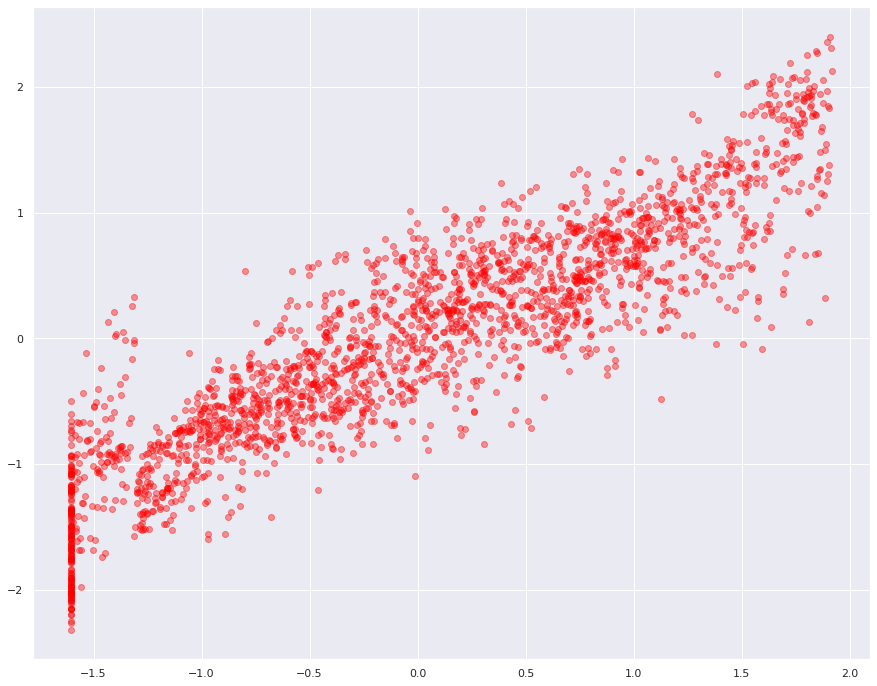

In [ ]:
# predicting test set results
plt.figure(figsize=(15, 12))
y_prediction = car.predict(X_test)
plt.scatter(y_test, y_prediction, color='red', alpha=0.4)

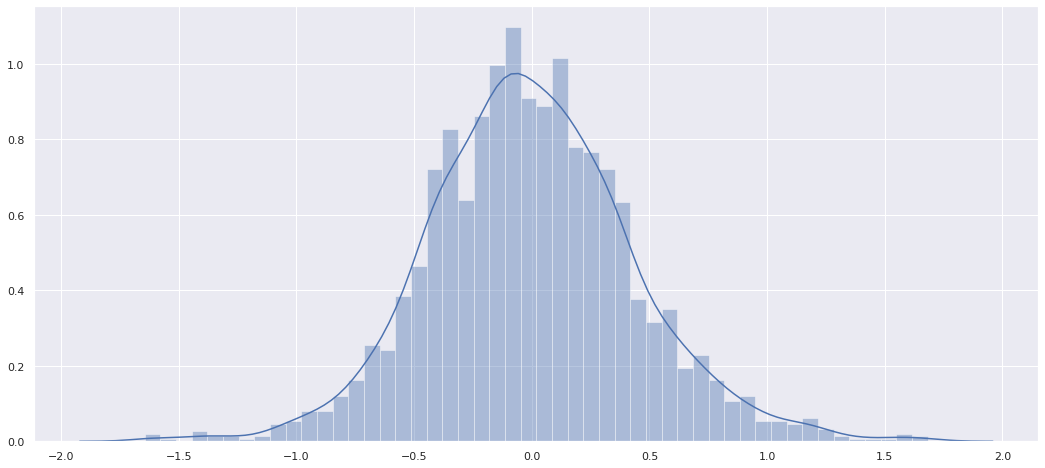

In [ ]:
plt.figure(figsize=(18, 8))
sns.distplot((y_test-y_prediction), bins=50)

In [ ]:
from sklearn import metrics     # to check performance in different ML algorithms

In [ ]:
# Checking Performance of Multivariate Linear Regression
print("Mean Absolute Error of multivariate linear regression is:   ", metrics.mean_absolute_error(y_prediction, y_test))
print("Mean Squared Error of multivariate linear regression is:   ", metrics.mean_squared_error(y_prediction, y_test))
print("Root Mean Squared Error of multivariate linear regression is:   ", np.sqrt(metrics.mean_squared_error(y_prediction, y_test)))
print("Coefficient of Determination or r2-score of multivariate linear regression is:   ", metrics.r2_score(y_prediction, y_test))

Mean Absolute Error of multivariate linear regression is:    0.33702522137925567
Mean Squared Error of multivariate linear regression is:    0.18984212715496873
Root Mean Squared Error of multivariate linear regression is:    0.4357087641475309
Coefficient of Determination or r2-score of multivariate linear regression is:    0.7627619951723961


### 10.2 - Support Vector Regressor

#### 10.2.1 -> Using RBF Kernel

In [ ]:
#Fitting of Support Vector Regressor using rbf kernel into training data
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

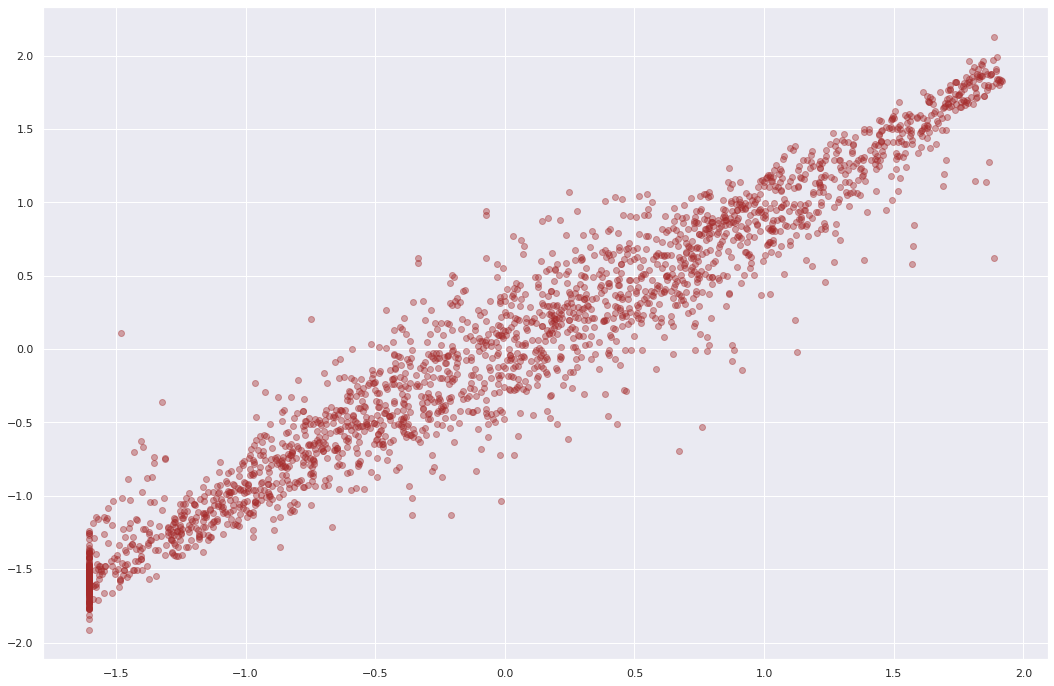

In [ ]:
plt.figure(figsize=(18, 12))
pred = svr.predict(X_test)
plt.scatter(y_test, pred, alpha=0.4, color='brown')

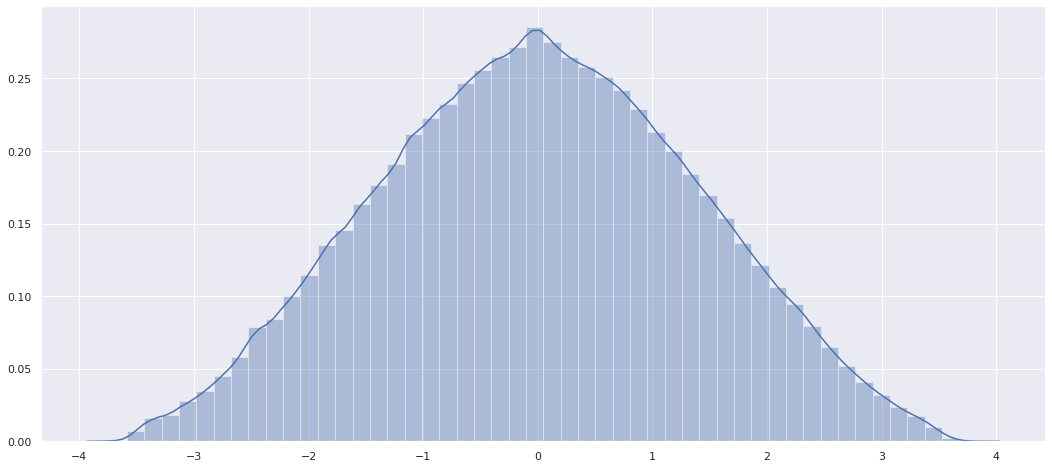

In [ ]:
plt.figure(figsize=(18, 8))
sns.distplot((y_test-pred), bins=50)

In [ ]:
# Checking Performance of Support Vector Regressor using RBF kernel
print("Mean Absolute Error of Support Vector Regressor using RBF kernel is:   ", metrics.mean_absolute_error(pred, y_test))
print("Mean Squared Error of Support Vector Regressor using RBF kernel is:   ", metrics.mean_squared_error(pred, y_test))
print("Root Mean Squared Error of Support Vector Regressor using RBF kernel is:   ", np.sqrt(metrics.mean_squared_error(pred, y_test)))
print("r2-score of Support Vector Regressor using RBF kernel is:   ", metrics.r2_score(pred, y_test))

Mean Absolute Error of Support Vector Regressor using RBF kernel is:    0.18354330224363402
Mean Squared Error of Support Vector Regressor using RBF kernel is:    0.06484708573680295
Root Mean Squared Error of Support Vector Regressor using RBF kernel is:    0.2546509095542424
r2-score of Support Vector Regressor using RBF kernel is:    0.9292813520310538


#### 10.2.2 -> Using Linear Kernel

In [ ]:
#Fitting of Support Vector Regressor using linear kernel into training data
from sklearn.svm import SVR
svr2 = SVR(kernel='linear')
svr2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

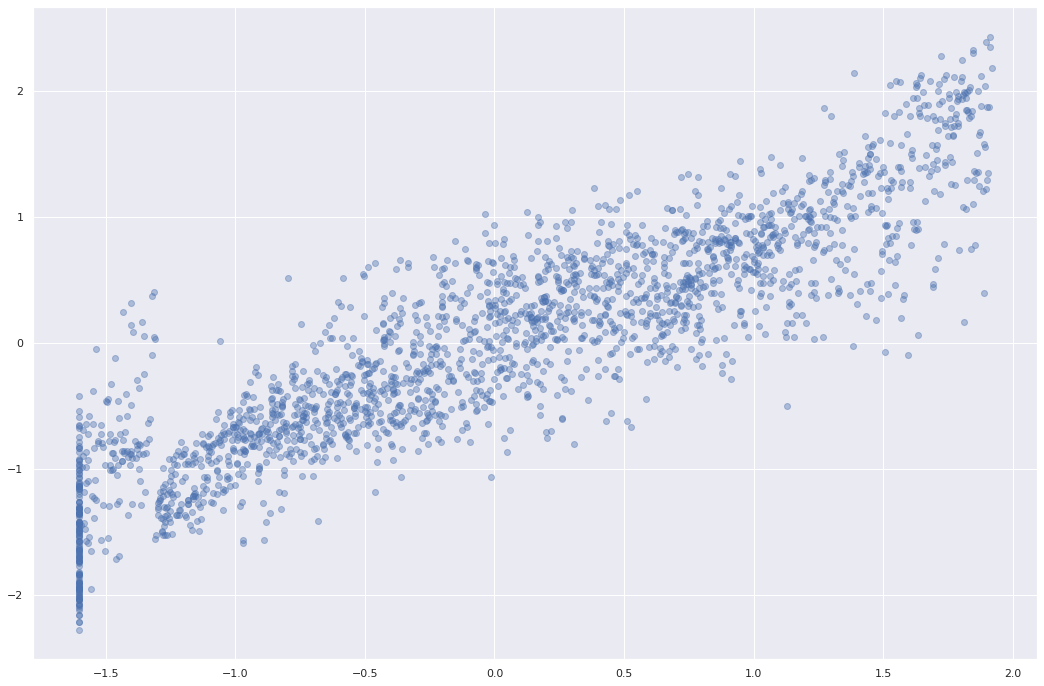

In [ ]:
plt.figure(figsize=(18, 12))
pred2=svr2.predict(X_test)
plt.scatter(y_test, pred2, alpha=0.4)

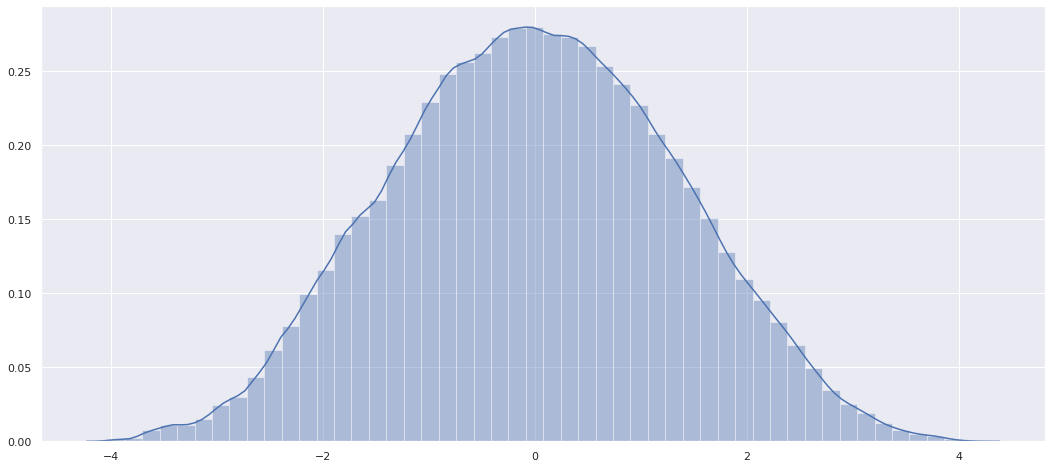

In [ ]:
plt.figure(figsize=(18, 8))
sns.distplot((y_test-pred2), bins=50)

In [ ]:
# Checking Performance of Support Vector Regressor using linear kernel
print("Mean Absolute Error of Support Vector Regressor using linear kernel is:   ", metrics.mean_absolute_error(pred2, y_test))
print("Mean Squared Error of Support Vector Regressor using linear kernel is:   ", metrics.mean_squared_error(pred2, y_test))
print("Root Mean Squared Error of Support Vector Regressor using linear kernel is:   ", np.sqrt(metrics.mean_squared_error(pred2, y_test)))
print("r2-score of Support Vector Regressor using linear kernel is:   ", metrics.r2_score(pred2, y_test))

Mean Absolute Error of Support Vector Regressor using linear kernel is:    0.3356928940669486
Mean Squared Error of Support Vector Regressor using linear kernel is:    0.19215692390029493
Root Mean Squared Error of Support Vector Regressor using linear kernel is:    0.43835707351461195
r2-score of Support Vector Regressor using linear kernel is:    0.760679824553378


### 10.3 - Decision Tree Regression 

In [ ]:
#Fitting Decision Tree regressor to Training data
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=100)

In [ ]:
# Train the model using Training sets
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

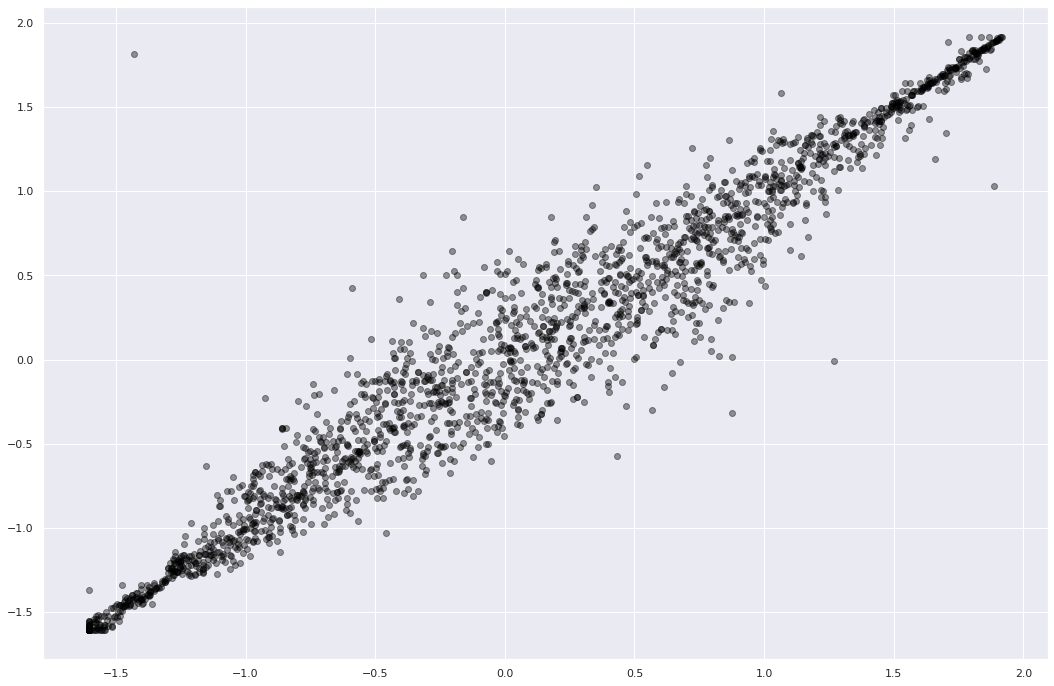

In [ ]:
#Predicting the Test Set Results
plt.figure(figsize=(18,12))
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.4, color='black')

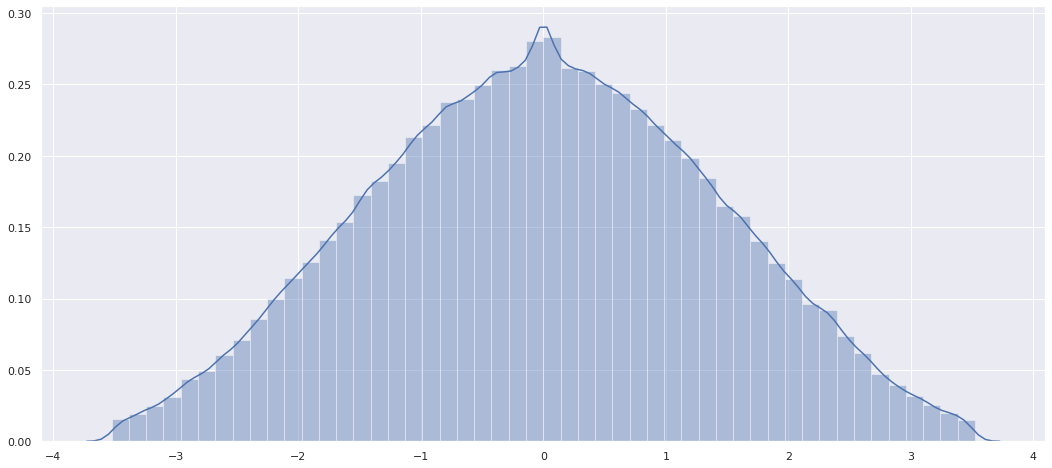

In [ ]:
plt.figure(figsize=(18, 8))
sns.distplot((y_test-y_pred), bins=50)

In [ ]:
# Checking Performance of Decision Tree Regressor
print("Mean Absolute Error of Decision Tree Regressor is:   ", metrics.mean_absolute_error(y_pred, y_test))
print("Mean Squared Error of Decision Tree Regressor is:   ", metrics.mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error of Decision Tree Regressor is:   ", np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print("r2-score of Decision Tree Regressor is:   ", metrics.r2_score(y_pred, y_test))

Mean Absolute Error of Decision Tree Regressor is:    0.1465369442409074
Mean Squared Error of Decision Tree Regressor is:    0.05082434177316598
Root Mean Squared Error of Decision Tree Regressor is:    0.2254425465016885
r2-score of Decision Tree Regressor is:    0.9477359346312555


### 10.4 - Random Forest Regression

In [ ]:
#Fitting of Random Forest Regressor into training data
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=100)

In [ ]:
# Train the model using the training sets
model2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

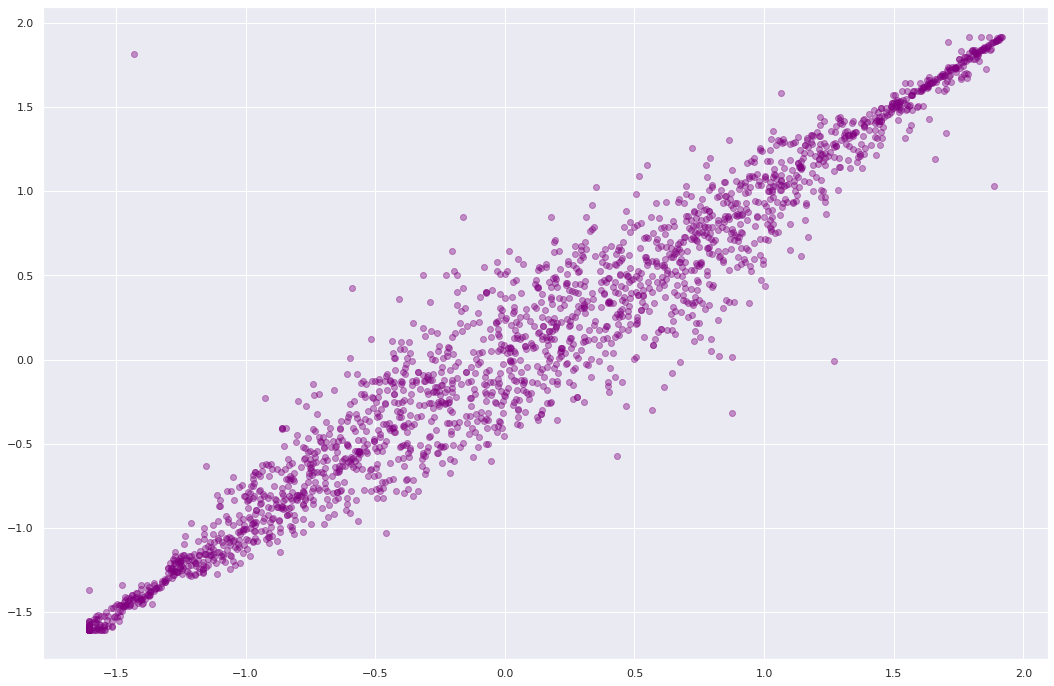

In [ ]:
# Predicting the Test Set Results
plt.figure(figsize=(18,12))
y_pred2=model.predict(X_test)                     
plt.scatter(y_test, y_pred2, alpha=0.4, color='purple')

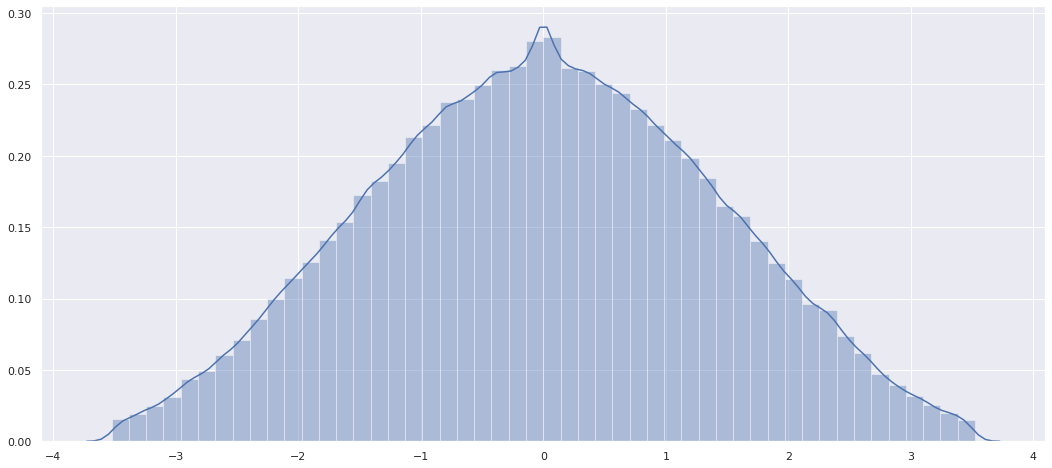

In [ ]:
plt.figure(figsize=(18, 8))
sns.distplot((y_test-y_pred2), bins=50)

In [ ]:
# Checking Performance of Random Forest Regressor
print("Mean Absolute Error of Random Forest Regressor is:   ", metrics.mean_absolute_error(y_pred2, y_test))
print("Mean Squared Error of Random Forest Regressor is:   ", metrics.mean_squared_error(y_pred2, y_test))
print("Root Mean Squared Error of Random Forest Regressor is:   ", np.sqrt(metrics.mean_squared_error(y_pred2, y_test)))
print("r2-score of Random Forest Regressor is:   ", metrics.r2_score(y_pred2, y_test))

Mean Absolute Error of Random Forest Regressor is:    0.1465369442409074
Mean Squared Error of Random Forest Regressor is:    0.05082434177316598
Root Mean Squared Error of Random Forest Regressor is:    0.2254425465016885
r2-score of Random Forest Regressor is:    0.9477359346312555


### 10.5 - Extra Trees Regression

In [ ]:
#Fitting of Extra Trees Regressor into training data
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
Xtra = ExtraTreesRegressor(n_estimators=150)

In [ ]:
# Training the model using training sets
Xtra.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=150, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

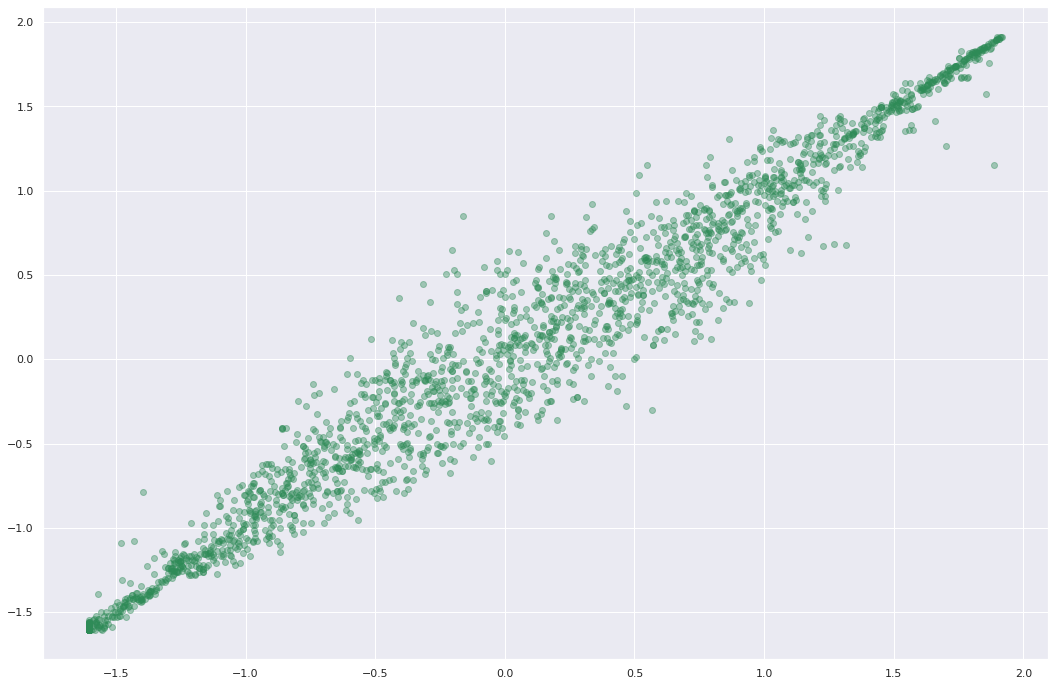

In [ ]:
#Predicting the Test Set Results
plt.figure(figsize=(18,12))
predict_y=Xtra.predict(X_test)                     
plt.scatter(y_test, predict_y, alpha=0.4, color='seagreen')

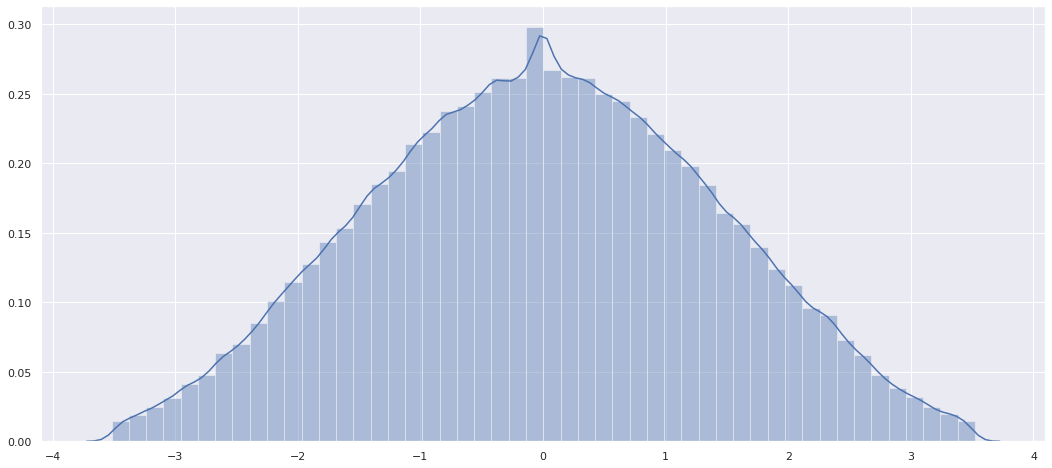

In [ ]:
plt.figure(figsize=(18,8))
sns.distplot((y_test-predict_y), bins=50)

In [ ]:
# Checking Performance of Extra Trees Regressor
print("Mean Absolute Error of Extra Trees Regressor is:   ", metrics.mean_absolute_error(predict_y, y_test))
print("Mean Squared Error of Extra Trees Regressor is:   ", metrics.mean_squared_error(predict_y, y_test))
print("Root Mean Squared Error of Extra Trees Regressor is:   ", np.sqrt(metrics.mean_squared_error(predict_y, y_test)))
print("r2-score of Extra Trees Regressor is:   ", metrics.r2_score(predict_y, y_test))

Mean Absolute Error of Extra Trees Regressor is:    0.1398562843606362
Mean Squared Error of Extra Trees Regressor is:    0.041148897258760045
Root Mean Squared Error of Extra Trees Regressor is:    0.20285190967491543
r2-score of Extra Trees Regressor is:    0.9572431489473704


### 10.6 - Gradient Boosting Regression

In [ ]:
#Fitting of Gradient Boosting Regressor into training data
from sklearn.ensemble import GradientBoostingRegressor
ada = GradientBoostingRegressor()
ada.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

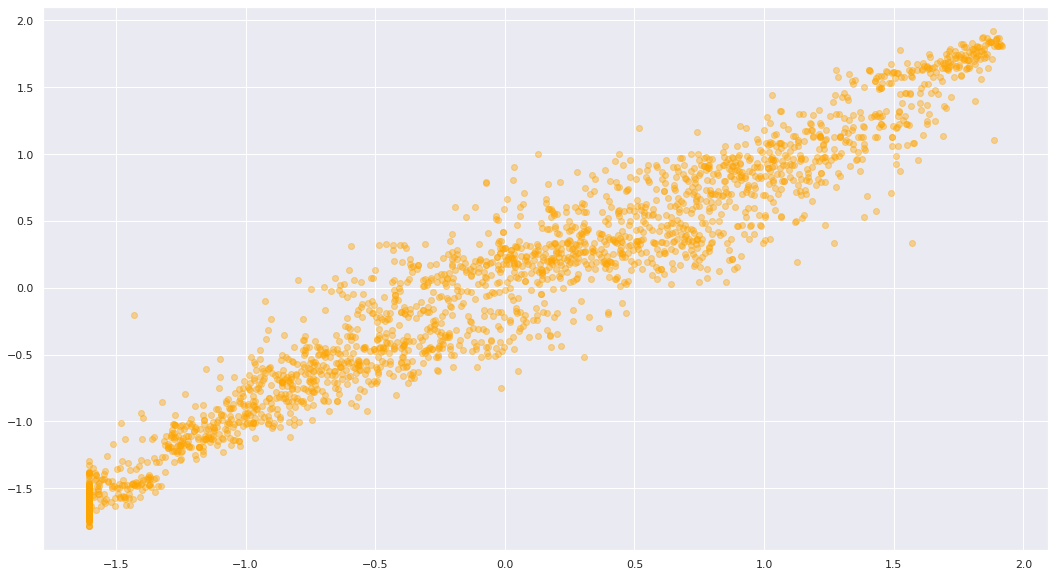

In [ ]:
# Predicting test set results 
plt.figure(figsize=(18, 10))
pred2_y=ada.predict(X_test)
plt.scatter(y_test, pred2_y, alpha=0.4, color='orange')

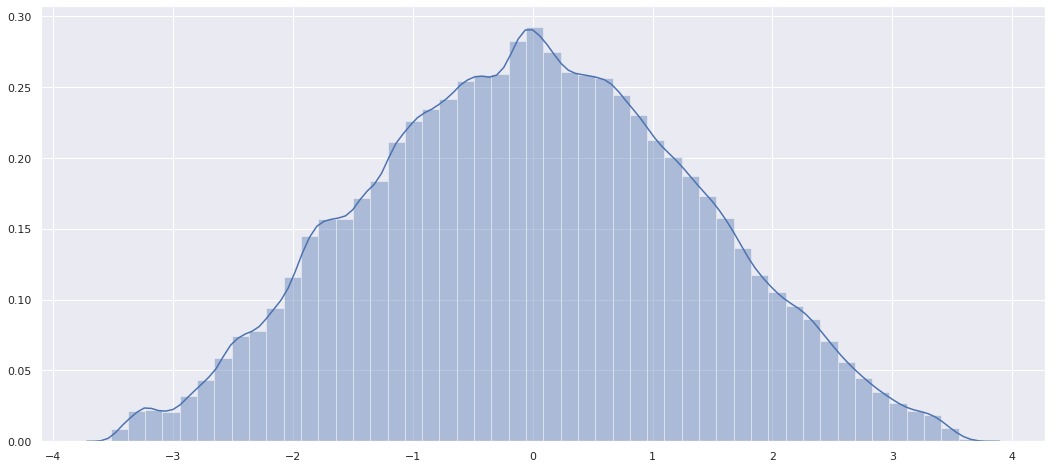

In [ ]:
plt.figure(figsize=(18, 8))
sns.distplot((y_test-pred2_y), bins=50)

In [ ]:
# Checking Performance of Gradient Boosting Regressor
print("Mean Absolute Error of Gradient Boosting Regressor is:   ", metrics.mean_absolute_error(pred2_y, y_test))
print("Mean Squared Error of Gradient Boosting Regressor is:   ", metrics.mean_squared_error(pred2_y, y_test))
print("Root Mean Squared Error of Gradient Boosting Regressor is:   ", np.sqrt(metrics.mean_squared_error(pred2_y, y_test)))
print("r2-score of Gradient Boosting Regressor is:   ", metrics.r2_score(pred2_y, y_test))

Mean Absolute Error of Gradient Boosting Regressor is:    0.19190992611544053
Mean Squared Error of Gradient Boosting Regressor is:    0.06605543385752898
Root Mean Squared Error of Gradient Boosting Regressor is:    0.2570125169277344
r2-score of Gradient Boosting Regressor is:    0.9251329223022894
